# Prosper Loan Data Analysis

## Preliminary Wrangling

> Prosper loan dataset contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.<br>
> <br>
> Prosper was founded in 2005 as the first peer-to-peer lending marketplace in the United States. Since then, Prosper has facilitated more than USD 12 billion in loans to more than 770,000 people.<br>
> Through Prosper, people can invest in each other in a way that is financially and socially rewarding. Borrowers apply online for a fixed-rate, fixed-term loan between USD 2,000 and USD 40,000. Individuals and institutions can invest in the loans and earn attractive returns. Prosper handles all loan servicing on behalf of the matched borrowers and investors. (source: https://www.prosper.com/about)

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
from pywaffle import Waffle
import plotly.express as px

pd.set_option('display.max_colwidth', None) # to display the whole strings and not collapse them
pd.set_option('display.max_columns', None) # to not collapse columns when viewing data
pd.set_option('display.max_rows', None) # to display all rows in the output

import warnings
warnings.filterwarnings("ignore") # warnings off

In [2]:
df_full = pd.read_csv('prosperLoanData.csv')
df_full.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [3]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

Using 81 variables for the analysis is not realistic, we will select around 15 of the most interesting ones.<br>
We will use the data dictionary to assist with the selection of relevant variables:

| Variable                            | Description                                                                                                                                                                                                                                                                                                                                                                                                                                                                     |
|-------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ListingKey                         | Unique key for each listing,   same value as the 'key' used in the listing object in the API.                                                                                                                                                                                                                                                                                                                                                                                   |
| ListingNumber                       | The number that uniquely   identifies the listing to the public as displayed on the website.                                                                                                                                                                                                                                                                                                                                                                                    |
| ListingCreationDate                 | The date the listing was   created.                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| **CreditGrade**                         | The Credit rating that was   assigned at the time the listing went live. Applicable for listings pre-2009   period and will only be populated for those listings.                                                                                                                                                                                                                                                                                                               |
|**Term**                                | The length of the loan expressed   in months.                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| **LoanStatus**                          | The current status of the loan:   Cancelled,  Chargedoff, Completed,   Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will   be accompanied by a delinquency bucket.                                                                                                                                                                                                                                                                                   |
| **ClosedDate**                          | Closed date is applicable for   Cancelled, Completed, Chargedoff and Defaulted loan statuses.                                                                                                                                                                                                                                                                                                                                                                                   |
| **BorrowerAPR**                         | The Borrower's Annual Percentage   Rate (APR) for the loan.                                                                                                                                                                                                                                                                                                                                                                                                                     |
| **BorrowerRate**                        | The Borrower's interest rate for   this loan.                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| LenderYield                         | The Lender yield on the loan.   Lender yield is equal to the interest rate on the loan less the servicing   fee.                                                                                                                                                                                                                                                                                                                                                                |
| EstimatedEffectiveYield             | Effective yield is equal to the   borrower interest rate (i) minus the servicing fee rate, (ii) minus estimated   uncollected interest on charge-offs, (iii) plus estimated collected late   fees.  Applicable for loans originated   after July 2009.                                                                                                                                                                                                                          |
| EstimatedLoss                       | Estimated loss is the estimated   principal loss on charge-offs. Applicable for loans originated after July   2009.                                                                                                                                                                                                                                                                                                                                                             |
| EstimatedReturn                     | The estimated return assigned to   the listing at the time it was created. Estimated return is the difference   between the Estimated Effective Yield and the Estimated Loss Rate. Applicable   for loans originated after July 2009.                                                                                                                                                                                                                                           |
| ProsperRating   (numeric)           | The  Prosper Rating assigned at the time the   listing was created: 0 - N/A, 1 - HR, 2 - E, 3 - D, 4 - C, 5 - B, 6 - A, 7 -   AA.  Applicable for loans originated   after July 2009.                                                                                                                                                                                                                                                                                           |
| **ProsperRating   (Alpha)**             | The Prosper Rating assigned at   the time the listing was created between AA - HR.  Applicable for loans originated after July   2009.                                                                                                                                                                                                                                                                                                                                          |
| **ProsperScore**                        | A custom risk score built using   historical Prosper data. The score ranges from 1-10, with 10 being the best,   or lowest risk score.  Applicable for   loans originated after July 2009.                                                                                                                                                                                                                                                                                      |
| **ListingCategory**                     | The category of the listing that   the borrower selected when posting their listing: 0 - Not Available, 1 - Debt   Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 -   Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 -   Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household   Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 -   RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans |
| BorrowerState                       | The two letter abbreviation of   the state of the address of the borrower at the time the Listing was created.                                                                                                                                                                                                                                                                                                                                                                  |
| Occupation                          | The Occupation selected by the   Borrower at the time they created the listing.                                                                                                                                                                                                                                                                                                                                                                                                 |
| **EmploymentStatus**                    | The employment status of the   borrower at the time they posted the listing.                                                                                                                                                                                                                                                                                                                                                                                                    |
| EmploymentStatusDuration            | The length in months of the   employment status at the time the listing was created.                                                                                                                                                                                                                                                                                                                                                                                            |
| **IsBorrowerHomeowner**                 | A Borrower will be classified as   a homowner if they have a mortgage on their credit profile or provide   documentation confirming they are a homeowner.                                                                                                                                                                                                                                                                                                                       |
| CurrentlyInGroup                    | Specifies whether or not the   Borrower was in a group at the time the listing was created.                                                                                                                                                                                                                                                                                                                                                                                     |
| GroupKey                            | The Key of the group in which   the Borrower is a member of. Value will be null if the borrower does not have   a group affiliation.                                                                                                                                                                                                                                                                                                                                            |
| DateCreditPulled                    | The date the credit profile was   pulled.                                                                                                                                                                                                                                                                                                                                                                                                                                       |
| **CreditScoreRangeLower**               | The lower value representing the   range of the borrower's credit score as provided by a consumer credit rating   agency.                                                                                                                                                                                                                                                                                                                                                       |
| **CreditScoreRangeUpper**               | The upper value representing the   range of the borrower's credit score as provided by a consumer credit rating   agency.                                                                                                                                                                                                                                                                                                                                                       |
| FirstRecordedCreditLine             | The date the first credit line   was opened.                                                                                                                                                                                                                                                                                                                                                                                                                                    |
| CurrentCreditLines                  | Number of current credit lines   at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                     |
| OpenCreditLines                     | Number of open credit lines at   the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                        |
| TotalCreditLinespast7years          | Number of credit lines in the   past seven years at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                     |
| OpenRevolvingAccounts               | Number of open revolving   accounts at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                  |
| OpenRevolvingMonthlyPayment         | Monthly payment on revolving   accounts at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                              |
| InquiriesLast6Months                | Number of inquiries in the past   six months at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                         |
| TotalInquiries                      | Total number of inquiries at the   time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                          |
| CurrentDelinquencies                | Number of accounts delinquent at   the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                      |
| AmountDelinquent                    | Dollars delinquent at the time   the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                                 |
| DelinquenciesLast7Years             | Number of delinquencies in the   past 7 years at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                        |
| PublicRecordsLast10Years            | Number of public records in the   past 10 years at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                      |
| PublicRecordsLast12Months           | Number of public records in the   past 12 months at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                     |
| RevolvingCreditBalance              | Dollars of revolving credit at   the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                        |
| BankcardUtilization                 | The percentage of available   revolving credit that is utilized at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                      |
| AvailableBankcardCredit             | The total available credit via   bank card at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                           |
| TotalTrades                         | Number of trade lines ever   opened at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                                  |
| TradesNeverDelinquent               | Number of trades that have never   been delinquent at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                   |
| TradesOpenedLast6Months             | Number of trades opened in the   last 6 months at the time the credit profile was pulled.                                                                                                                                                                                                                                                                                                                                                                                       |
| **DebtToIncomeRatio**                   | The debt to income ratio of the   borrower at the time the credit profile was pulled. This value is Null if the   debt to income ratio is not available. This value is capped at 10.01 (any   debt to income ratio larger than 1000% will be returned as 1001%).                                                                                                                                                                                                                |
| **IncomeRange**                         | The income range of the borrower   at the time the listing was created.                                                                                                                                                                                                                                                                                                                                                                                                         |
| **IncomeVerifiable**                    | The borrower indicated they have   the required documentation to support their income.                                                                                                                                                                                                                                                                                                                                                                                          |
| StatedMonthlyIncome                 | The monthly income the borrower   stated at the time the listing was created.                                                                                                                                                                                                                                                                                                                                                                                                   |
| **LoanKey**                             | Unique key for each loan. This   is the same key that is used in the API.                                                                                                                                                                                                                                                                                                                                                                                                       |
| TotalProsperLoans                   | Number of Prosper loans the   borrower at the time they created this listing. This value will be null if   the borrower had no prior loans.                                                                                                                                                                                                                                                                                                                                     |
| TotalProsperPaymentsBilled          | Number of on time payments the   borrower made on Prosper loans at the time they created this listing. This   value will be null if the borrower had no prior loans.                                                                                                                                                                                                                                                                                                            |
| OnTimeProsperPayments               | Number of on time payments the   borrower had made on Prosper loans at the time they created this listing.   This value will be null if the borrower has no prior loans.                                                                                                                                                                                                                                                                                                        |
| ProsperPaymentsLessThanOneMonthLate | Number of payments the borrower   made on Prosper loans that were less than one month late at the time they   created this listing. This value will be null if the borrower had no prior   loans.                                                                                                                                                                                                                                                                               |
| ProsperPaymentsOneMonthPlusLate     | Number of payments the borrower   made on Prosper loans that were greater than one month late at the time they   created this listing. This value will be null if the borrower had no prior   loans.                                                                                                                                                                                                                                                                            |
| ProsperPrincipalBorrowed            | Total principal borrowed on   Prosper loans at the time the listing was created. This value will be null if   the borrower had no prior loans.                                                                                                                                                                                                                                                                                                                                  |
| ProsperPrincipalOutstanding         | Principal outstanding on Prosper   loans at the time the listing was created. This value will be null if the   borrower had no prior loans.                                                                                                                                                                                                                                                                                                                                     |
| ScorexChangeAtTimeOfListing         | Borrower's credit score change   at the time the credit profile was pulled. This will be the change relative   to the borrower's last Prosper loan. This value will be null if the borrower   had no prior loans.                                                                                                                                                                                                                                                               |
| LoanCurrentDaysDelinquent           | The number of days   delinquent.                                                                                                                                                                                                                                                                                                                                                                                                                                                |
| LoanFirstDefaultedCycleNumber       | The cycle the loan was charged   off. If the loan has not charged off the value will be null.                                                                                                                                                                                                                                                                                                                                                                                   |
| LoanMonthsSinceOrigination          | Number of months since the loan   originated.                                                                                                                                                                                                                                                                                                                                                                                                                                   |
| LoanNumber                          | Unique numeric value associated   with the loan.                                                                                                                                                                                                                                                                                                                                                                                                                                |
| **LoanOriginalAmount**                  | The origination amount of the   loan.                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| **LoanOriginationDate**                 | The date the loan was   originated.                                                                                                                                                                                                                                                                                                                                                                                                                                             |
| LoanOriginationQuarter              | The quarter in which the loan   was originated.                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| MemberKey                           | The unique key that is   associated with the borrower. This is the same identifier that is used in the   API member object.                                                                                                                                                                                                                                                                                                                                                     |
| **MonthlyLoanPayment**                  | The scheduled monthly loan   payment.                                                                                                                                                                                                                                                                                                                                                                                                                                           |
| LP_CustomerPayments                 | Pre charge-off cumulative gross   payments made by the borrower on the loan. If the loan has charged off, this   value will exclude any recoveries.                                                                                                                                                                                                                                                                                                                             |
| LP_CustomerPrincipalPayments        | Pre charge-off cumulative   principal payments made by the borrower on the loan. If the loan has charged   off, this value will exclude any recoveries.                                                                                                                                                                                                                                                                                                                         |
| LP_InterestandFees                  | Pre charge-off cumulative   interest and fees paid by the borrower. If the loan has charged off, this   value will exclude any recoveries.                                                                                                                                                                                                                                                                                                                                      |
| LP_ServiceFees                      | Cumulative service fees paid by   the investors who have invested in the loan.                                                                                                                                                                                                                                                                                                                                                                                                  |
| LP_CollectionFees                   | Cumulative collection fees paid   by the investors who have invested in the loan.                                                                                                                                                                                                                                                                                                                                                                                               |
| LP_GrossPrincipalLoss               | The gross charged off amount of   the loan.                                                                                                                                                                                                                                                                                                                                                                                                                                     |
| LP_NetPrincipalLoss                 | The principal that remains   uncollected after any recoveries.                                                                                                                                                                                                                                                                                                                                                                                                                  |
| LP_NonPrincipalRecoverypayments     | The interest and fee component   of any recovery payments. The current payment policy applies payments in the   following order: Fees, interest, principal.                                                                                                                                                                                                                                                                                                                     |
| PercentFunded                       | Percent the listing was funded.                                                                                                                                                                                                                                                                                                                                                                                                                                                 |
| Recommendations                     | Number of recommendations the   borrower had at the time the listing was created.                                                                                                                                                                                                                                                                                                                                                                                               |
| InvestmentFromFriendsCount          | Number of friends that made an   investment in the loan.                                                                                                                                                                                                                                                                                                                                                                                                                        |
| InvestmentFromFriendsAmount         | Dollar amount of investments   that were made by friends.                                                                                                                                                                                                                                                                                                                                                                                                                       |
| Investors                           | The number of investors that   funded the loan.                                                                                                                                                                                                                                                                                                                                                                                                                                 |

### Dealing with duplicates

In [4]:
# there seem to be multiple loan identifiers
df_full.ListingKey.nunique()

113066

In [5]:
df_full.ListingNumber.nunique()

113066

In [6]:
df_full.LoanKey.nunique()

113066

We can choose any of the IDs to be the index of our dataset since they all seem to represent the loan ID.<br>
However, we have a slightly lower number of unique keys than data points.<br>
Checking the above unique identifiers suggests there are some duplicates in the data, let's clean these first:

In [7]:
df_full[df_full.LoanKey.duplicated() == True].count()['LoanKey']

871

In [8]:
df_full[df_full.LoanKey.duplicated() == True]['LoanKey'].head(5)

9       02163700809231365A56A1C
999     CB643706582969191E8C26B
2539    DC303708663304668E74587
4942    8D84369399064302947D8B5
5812    129C369881799628360C904
Name: LoanKey, dtype: object

In [9]:
# different in ProsperScore, where the value also should not be > 10 according to the dictionary and here we have 11
df_full[df_full.LoanKey == '02163700809231365A56A1C']

ListingKey  ListingNumber            ListingCreationDate  \
8  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   
9  0F043596202561788EA13D5        1023355  2013-12-02 10:43:39.117000000   

  CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
8         NaN    36    Current        NaN       0.0762        0.0629   
9         NaN    36    Current        NaN       0.0762        0.0629   

   LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
8       0.0529                  0.05221         0.0099          0.04231   
9       0.0529                  0.05221         0.0099          0.04231   

   ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
8                      7.0                    AA           9.0   
9                      7.0                    AA          11.0   

   ListingCategory (numeric) BorrowerState    Occupation EmploymentStatus  \
8                          7            IL  Food Service         Employed   
9                          7            IL  Food Service         Employed   

   EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup GroupKey  \
8                     269.0                 True             False      NaN   
9                     269.0                 True             False      NaN   

      DateCreditPulled  CreditScoreRangeLower  CreditScoreRangeUpper  \
8  2013-12-02 10:43:39                  820.0                  839.0   
9  2013-12-02 10:43:39                  820.0                  839.0   

  FirstRecordedCreditLine  CurrentCreditLines  OpenCreditLines  \
8     1993-04-01 00:00:00                17.0             16.0   
9     1993-04-01 00:00:00                17.0             16.0   

   TotalCreditLinespast7years  OpenRevolvingAccounts  \
8                        32.0                     12   
9                        32.0                     12   

   OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
8                        219.0                   1.0             6.0   
9                        219.0                   1.0             6.0   

   CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
8                   0.0               0.0                      0.0   
9                   0.0               0.0                      0.0   

   PublicRecordsLast10Years  PublicRecordsLast12Months  \
8                       0.0                        0.0   
9                       0.0                        0.0   

   RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
8                  9906.0                 0.11                  77696.0   
9                  9906.0                 0.11                  77696.0   

   TotalTrades  TradesNeverDelinquent (percentage)  TradesOpenedLast6Months  \
8         29.0                                 1.0                      1.0   
9         29.0                                 1.0                      1.0   

   DebtToIncomeRatio     IncomeRange  IncomeVerifiable  StatedMonthlyIncome  \
8               0.25  $25,000-49,999              True          3333.333333   
9               0.25  $25,000-49,999              True          3333.333333   

                   LoanKey  TotalProsperLoans  TotalProsperPaymentsBilled  \
8  02163700809231365A56A1C                NaN                         NaN   
9  02163700809231365A56A1C                NaN                         NaN   

   OnTimeProsperPayments  ProsperPaymentsLessThanOneMonthLate  \
8                    NaN                                  NaN   
9                    NaN                                  NaN   

   ProsperPaymentsOneMonthPlusLate  ProsperPrincipalBorrowed  \
8                              NaN                       NaN   
9                              NaN                       NaN   

   ProsperPrincipalOutstanding  ScorexChangeAtTimeOfListing  \
8                          NaN                          NaN   
9                          NaN        

In [10]:
# the same issue as above
df_full[df_full.LoanKey == 'CB643706582969191E8C26B']

ListingKey  ListingNumber            ListingCreationDate  \
998    0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
999    0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   
57494  0A0635972629771021E38F3        1055932  2013-12-18 14:25:17.053000000   

      CreditGrade  Term LoanStatus ClosedDate  BorrowerAPR  BorrowerRate  \
998           NaN    60    Current        NaN       0.1771        0.1535   
999           NaN    60    Current        NaN       0.1771        0.1535   
57494         NaN    60    Current        NaN       0.1771        0.1535   

       LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
998         0.1435                  0.13507         0.0599          0.07517   
999         0.1435                  0.13507         0.0599          0.07517   
57494       0.1435                  0.13507         0.0599          0.07517   

       ProsperRating (numeric) ProsperRating (Alpha)  ProsperScore  \
998                        5.0                     B           6.0   
999                        5.0                     B           7.0   
57494                      5.0                     B           8.0   

       ListingCategory (numeric) BorrowerState Occupation EmploymentStatus  \
998                            1            MD      Other         Employed   
999                            1            MD      Other         Employed   
57494                          1            MD      Other         Employed   

       EmploymentStatusDuration  IsBorrowerHomeowner  CurrentlyInGroup  \
998                       100.0                 True             False   
999                       100.0                 True             False   
57494                     100.0                 True             False   

      GroupKey     DateCreditPulled  CreditScoreRangeLower  \
998        NaN  2014-02-08 11:39:13                  760.0   
999        NaN  2014-02-08 11:39:13                  760.0   
57494      NaN  2014-02-08 11:39:13                  760.0   

       CreditScoreRangeUpper FirstRecordedCreditLine  CurrentCreditLines  \
998                    779.0     1994-11-01 00:00:00                16.0   
999                    779.0     1994-11-01 00:00:00                16.0   
57494                  779.0     1994-11-01 00:00:00                16.0   

       OpenCreditLines  TotalCreditLinespast7years  OpenRevolvingAccounts  \
998               16.0                        34.0                     15   
999               16.0                        34.0                     15   
57494             16.0                        34.0                     15   

       OpenRevolvingMonthlyPayment  InquiriesLast6Months  TotalInquiries  \
998                          623.0                   1.0             5.0   
999                          623.0                   1.0             5.0   
57494                        623.0                   1.0             5.0   

       CurrentDelinquencies  AmountDelinquent  DelinquenciesLast7Years  \
998                     0.0               0.0                      0.0   
999                     0.0               0.0                      0.0   
57494                   0.0               0.0                      0.0   

       PublicRecordsLast10Years  PublicRecordsLast12Months  \
998                         0.0                        0.0   
999                         0.0                        0.0   
57494                       0.0                        0.0   

       RevolvingCreditBalance  BankcardUtilization  AvailableBankcardCredit  \
998                    8028.0                 0.27                  14190.0   
999                    8028.0                 0.27                  14190.0   
57494                  8028.0                 0.27                  14190.0   

       TotalTrades  TradesNeverDelinquent (percentage)  \
998           32.0                                0.96   
999           32.0                     

In [11]:
df_full.duplicated().sum()

0

In [12]:
# drop the problematic ProsperScore column
df_full.drop('ProsperScore', axis=1, inplace=True)

In [13]:
df_full.duplicated().sum()

871

In [14]:
# drop duplicate rows
df_full.drop_duplicates(inplace=True)
df_full[df_full.LoanKey.duplicated() == True].count()['LoanKey']

0

In [15]:
df_full.LoanKey.nunique()

113066

In [16]:
# all loans are now included only once
df_full.shape

(113066, 80)

### Variables selection and basic data cleaning

The main loan and borrower indicators were selected for further analysis based on the data dictionary.<br>
The full selected list can be seen below:

In [17]:
# this variable subset will be a starting point for further cleaning and investigation of relevant data
df = df_full[['LoanKey', 'LoanOriginationDate', 'ClosedDate', 'LoanStatus', 'Term', 'LoanOriginalAmount', 'MonthlyLoanPayment',\
              'ListingCategory (numeric)', 'BorrowerAPR', 'BorrowerRate', \
              'CreditGrade', 'ProsperRating (Alpha)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',\
              'IncomeRange', 'IncomeVerifiable', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'EmploymentStatus',\
              'IsBorrowerHomeowner']]
df.head()

LoanKey  LoanOriginationDate           ClosedDate  \
0  E33A3400205839220442E84  2007-09-12 00:00:00  2009-08-14 00:00:00   
1  9E3B37071505919926B1D82  2014-03-03 00:00:00                  NaN   
2  6954337960046817851BCB2  2007-01-17 00:00:00  2009-12-17 00:00:00   
3  A0393664465886295619C51  2012-11-01 00:00:00                  NaN   
4  A180369302188889200689E  2013-09-20 00:00:00                  NaN   

  LoanStatus  Term  LoanOriginalAmount  MonthlyLoanPayment  \
0  Completed    36                9425              330.43   
1    Current    36               10000              318.93   
2  Completed    36                3001              123.32   
3    Current    36               10000              321.45   
4    Current    36               15000              563.97   

   ListingCategory (numeric)  BorrowerAPR  BorrowerRate CreditGrade  \
0                          0      0.16516        0.1580           C   
1                          2      0.12016        0.0920         NaN   
2                          0      0.28269        0.2750          HR   
3                         16      0.12528        0.0974         NaN   
4                          2      0.24614        0.2085         NaN   

  ProsperRating (Alpha)  CreditScoreRangeLower  CreditScoreRangeUpper  \
0                   NaN                  640.0                  659.0   
1                     A                  680.0                  699.0   
2                   NaN                  480.0                  499.0   
3                     A                  800.0                  819.0   
4                     D                  680.0                  699.0   

      IncomeRange  IncomeVerifiable  StatedMonthlyIncome  DebtToIncomeRatio  \
0  $25,000-49,999              True          3083.333333               0.17   
1  $50,000-74,999              True          6125.000000               0.18   
2   Not displayed              True          2083.333333               0.06   
3  $25,000-49,999              True          2875.000000               0.15   
4       $100,000+              True          9583.333333               0.26   

  EmploymentStatus  IsBorrowerHomeowner  
0    Self-employed                 True  
1         Employed                False  
2    Not available                False  
3         Employed                 True  
4         Employed                 True

In [18]:
# data type changes follow
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 20 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanKey                    113066 non-null  object 
 1   LoanOriginationDate        113066 non-null  object 
 2   ClosedDate                 55076 non-null   object 
 3   LoanStatus                 113066 non-null  object 
 4   Term                       113066 non-null  int64  
 5   LoanOriginalAmount         113066 non-null  int64  
 6   MonthlyLoanPayment         113066 non-null  float64
 7   ListingCategory (numeric)  113066 non-null  int64  
 8   BorrowerAPR                113041 non-null  float64
 9   BorrowerRate               113066 non-null  float64
 10  CreditGrade                28953 non-null   object 
 11  ProsperRating (Alpha)      83982 non-null   object 
 12  CreditScoreRangeLower      112475 non-null  float64
 13  CreditScoreRangeUpper      11

In [19]:
# rename columns with spaces
df.rename(columns={'ListingCategory (numeric)': 'ListingCategory', 'ProsperRating (Alpha)': 'ProsperRating'}, inplace=True)

In [20]:
# LoanKey as index
df.set_index('LoanKey', inplace=True)

In [21]:
# date columns as dates
df.LoanOriginationDate = pd.to_datetime(df.LoanOriginationDate)
df.ClosedDate = pd.to_datetime(df.ClosedDate)

In [22]:
df.IncomeRange.value_counts()

$25,000-49,999    31940
$50,000-74,999    30749
$100,000+         17188
$75,000-99,999    16780
Not displayed      7741
$1-24,999          7241
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [23]:
# reduce no. of IncomeRange categories by 1
df.IncomeRange.replace({'$0': 'Not employed'}, inplace=True) 

In [24]:
# CreditGrade, ProsperRating, IncomeRange as ordered categorical vars
var_dict = {'CreditGrade': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'ProsperRating': ['AA', 'A', 'B', 'C', 'D', 'E', 'HR', 'NC'],
           'IncomeRange': ['Not displayed', 'Not employed', '$1-24,999', 
                           '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']}
for var in var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = var_dict[var])
    df[var] = df[var].astype(ordered_var)

In [25]:
df.describe()

Term  LoanOriginalAmount  MonthlyLoanPayment  ListingCategory  \
count  113066.000000       113066.000000       113066.000000    113066.000000   
mean       40.800170         8314.762307          271.932742         2.776838   
std        10.421518         6237.007841          192.549979         3.998188   
min        12.000000         1000.000000            0.000000         0.000000   
25%        36.000000         4000.000000          130.950000         1.000000   
50%        36.000000         6300.000000          217.370000         1.000000   
75%        36.000000        12000.000000          370.570000         3.000000   
max        60.000000        35000.000000         2251.510000        20.000000   

         BorrowerAPR   BorrowerRate  CreditScoreRangeLower  \
count  113041.000000  113066.000000          112475.000000   
mean        0.218980       0.192946             685.524961   
std         0.080483       0.074917              66.635895   
min         0.006530       0.000000               0.000000   
25%         0.156290       0.134000             660.000000   
50%         0.209840       0.184000             680.000000   
75%         0.283860       0.250600             720.000000   
max         0.512290       0.497500             880.000000   

       CreditScoreRangeUpper  StatedMonthlyIncome  DebtToIncomeRatio  
count          112475.000000         1.130660e+05      104594.000000  
mean              704.524961         5.605120e+03           0.276032  
std                66.635895         7.495596e+03           0.553738  
min                19.000000         0.000000e+00           0.000000  
25%               679.000000         3.199396e+03           0.140000  
50%               699.000000         4.666667e+03           0.220000  
75%               739.000000         6.824688e+03           0.320000  
max               899.000000         1.750003e+06          10.010000

### What is the structure of your dataset?

We are dealing with a loan database of over 113k loans with 81 variables. To be able to do a meaningful analysis, we had to select a subset of these variables.

### What is/are the main feature(s) of interest in your dataset?

The interest rate of the loan, its amount, and the credit rating of the borrower are the main features of interest.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The supporting features of interest are the loan characteristics on the one hand, such as the loan amount, the date when the loan was taken, the term of the loan, the status of the loan, and some borrower characteristics on the other hand, such as the income, the employment and housing situation and debt to income ration of the borrower.
 

## Univariate Exploration

In [26]:
df.head(3)

LoanOriginationDate ClosedDate LoanStatus  Term  \
LoanKey                                                                   
E33A3400205839220442E84          2007-09-12 2009-08-14  Completed    36   
9E3B37071505919926B1D82          2014-03-03        NaT    Current    36   
6954337960046817851BCB2          2007-01-17 2009-12-17  Completed    36   

                         LoanOriginalAmount  MonthlyLoanPayment  \
LoanKey                                                           
E33A3400205839220442E84                9425              330.43   
9E3B37071505919926B1D82               10000              318.93   
6954337960046817851BCB2                3001              123.32   

                         ListingCategory  BorrowerAPR  BorrowerRate  \
LoanKey                                                               
E33A3400205839220442E84                0      0.16516         0.158   
9E3B37071505919926B1D82                2      0.12016         0.092   
6954337960046817851BCB2                0      0.28269         0.275   

                        CreditGrade ProsperRating  CreditScoreRangeLower  \
LoanKey                                                                    
E33A3400205839220442E84           C           NaN                  640.0   
9E3B37071505919926B1D82         NaN             A                  680.0   
6954337960046817851BCB2          HR           NaN                  480.0   

                         CreditScoreRangeUpper     IncomeRange  \
LoanKey                                                          
E33A3400205839220442E84                  659.0  $25,000-49,999   
9E3B37071505919926B1D82                  699.0  $50,000-74,999   
6954337960046817851BCB2                  499.0   Not displayed   

                         IncomeVerifiable  StatedMonthlyIncome  \
LoanKey                                                          
E33A3400205839220442E84              True          3083.333333   
9E3B37071505919926B1D82              True          6125.000000   
6954337960046817851BCB2              True          2083.333333   

                         DebtToIncomeRatio EmploymentStatus  \
LoanKey                                                       
E33A3400205839220442E84               0.17    Self-employed   
9E3B37071505919926B1D82               0.18         Employed   
6954337960046817851BCB2               0.06    Not available   

                         IsBorrowerHomeowner  
LoanKey                                       
E33A3400205839220442E84                 True  
9E3B37071505919926B1D82                False  
6954337960046817851BCB2                False

In [27]:
df.shape

(113066, 19)

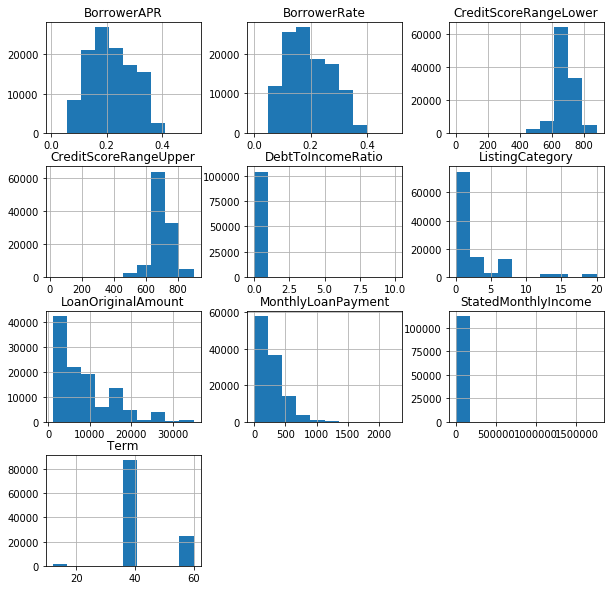

In [28]:
# all histograms in one place for a quick overview

# some vars are very skewed and will require transformations

df.hist(['Term', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'ListingCategory', 'BorrowerAPR', 'BorrowerRate',\
         'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'StatedMonthlyIncome', 'DebtToIncomeRatio'],\
        figsize=(10,10));

We will take look at all selected variables one by one to learn more details about their distributions.
### LoanOriginationDate

In [29]:
df.LoanOriginationDate.describe()

count                  113066
unique                   1873
top       2013-11-13 00:00:00
freq                      469
first     2005-11-15 00:00:00
last      2014-03-12 00:00:00
Name: LoanOriginationDate, dtype: object

In [30]:
df[df.LoanOriginationDate < '2009-01-01 00:00:00'].count()['LoanOriginationDate']

28940

Dataset includes loans from period 2005-2014.<br>
28,940 loans are from the period 2005-2008.

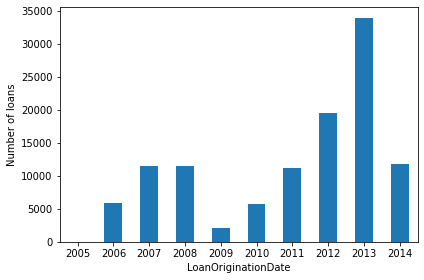

In [31]:
# 2009 was a critical year for Prosper
df.groupby(df.LoanOriginationDate.dt.year).count()['LoanOriginationDate'].plot(kind='bar')
plt.ylabel('Number of loans')
plt.xticks(rotation=0)
plt.tight_layout();

In [32]:
df['LoanYear'] = df['LoanOriginationDate'].dt.year
df.LoanYear.dtype

dtype('int64')

In [33]:
# let's look at the tails: 2005 and 2014 to know why there are fewer loans on those years
df[df.LoanOriginationDate.dt.year == 2005].count()['LoanOriginationDate']

22

In [34]:
# our data ends in March 2014
df.LoanOriginationDate.max()

Timestamp('2014-03-12 00:00:00')

Prosper started business in 2005, which is also the oldest loans which we have in the data set. However, there are only 22 loans from 2005.<br>
Prosper stopped their business between Nov 2008 - July 2009 due to a cease order by SEC, which is very much reflected in the low number of loans in 2009.<br>
Borrowers may come from 47 US states, bidders can come only from 28 US states since the relaunch. (source: https://en.wikipedia.org/wiki/Prosper_Marketplace)<br>
Since 2010, the number of new loans increases steadily, with a record number of new loans in 2013.<br>
We only have two months of full data for 2014.

### ClosedDate

In [35]:
# 55076 loans are already closed
df.ClosedDate.notnull().sum()

55076

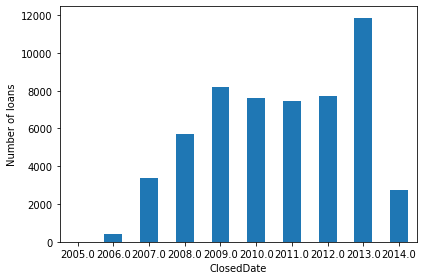

In [36]:
df.groupby(df.ClosedDate.dt.year).count()['ClosedDate'].plot(kind='bar')
plt.ylabel('Number of loans')
plt.xticks(rotation=0)
plt.tight_layout();

In [37]:
# months between loan origination and closing date
df['MonthsToClosed'] = ((df.ClosedDate - df.LoanOriginationDate) / np.timedelta64(1, 'M'))

In [38]:
df['MonthsToClosed'].describe()

count    55076.000000
mean        19.291197
std         11.615265
min        -45.536869
25%          9.232222
50%         17.051685
75%         31.015011
max         51.155055
Name: MonthsToClosed, dtype: float64

In [39]:
df[df['MonthsToClosed'] < 0]

LoanOriginationDate ClosedDate LoanStatus  Term  \
LoanKey                                                                   
5BA53702830459166F4AD14          2013-12-31 2010-03-16  Defaulted    36   
BF6034334495990283E5285          2008-10-17 2008-10-16  Cancelled    36   

                         LoanOriginalAmount  MonthlyLoanPayment  \
LoanKey                                                           
5BA53702830459166F4AD14                2500               82.31   
BF6034334495990283E5285                1000               32.62   

                         ListingCategory  BorrowerAPR  BorrowerRate  \
LoanKey                                                               
5BA53702830459166F4AD14                1      0.14206        0.1139   
BF6034334495990283E5285                1      0.16219        0.1075   

                        CreditGrade ProsperRating  CreditScoreRangeLower  \
LoanKey                                                                    
5BA53702830459166F4AD14         NaN             A                  660.0   
BF6034334495990283E5285           A           NaN                  720.0   

                         CreditScoreRangeUpper     IncomeRange  \
LoanKey                                                          
5BA53702830459166F4AD14                  679.0  $75,000-99,999   
BF6034334495990283E5285                  739.0  $25,000-49,999   

                         IncomeVerifiable  StatedMonthlyIncome  \
LoanKey                                                          
5BA53702830459166F4AD14             False          6250.000000   
BF6034334495990283E5285              True          2444.666667   

                         DebtToIncomeRatio EmploymentStatus  \
LoanKey                                                       
5BA53702830459166F4AD14                NaN    Self-employed   
BF6034334495990283E5285               0.34        Full-time   

                         IsBorrowerHomeowner  LoanYear  MonthsToClosed  
LoanKey                                                                 
5BA53702830459166F4AD14                False      2013      -45.536869  
BF6034334495990283E5285                False      2008       -0.032855

There are 2 loans with closed date prior to loan origination date, which we will delete:

In [40]:
df.drop(df[df['MonthsToClosed'] < 0].index, inplace=True)
df.shape

(113064, 21)

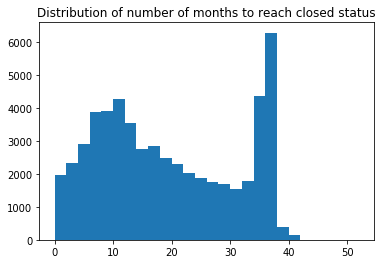

In [41]:
bins = np.arange(0, df['MonthsToClosed'].max()+2, 2)
plt.hist(data = df, x = 'MonthsToClosed', bins = bins)
plt.title('Distribution of number of months to reach closed status');

In [42]:
df[['LoanOriginationDate', 'ClosedDate', 'MonthsToClosed', 'Term', 'LoanStatus']].head()

LoanOriginationDate ClosedDate  MonthsToClosed  Term  \
LoanKey                                                                        
E33A3400205839220442E84          2007-09-12 2009-08-14       23.064129    36   
9E3B37071505919926B1D82          2014-03-03        NaT             NaN    36   
6954337960046817851BCB2          2007-01-17 2009-12-17       34.990452    36   
A0393664465886295619C51          2012-11-01        NaT             NaN    36   
A180369302188889200689E          2013-09-20        NaT             NaN    36   

                        LoanStatus  
LoanKey                             
E33A3400205839220442E84  Completed  
9E3B37071505919926B1D82    Current  
6954337960046817851BCB2  Completed  
A0393664465886295619C51    Current  
A180369302188889200689E    Current

There are 55k of closed loans. Generated column MonthsToClosed looks at number of months between loan origination date and closed date.<br>
The distribution of MonthsToClosed is bimodal with one peak around 12 months and another peak around 36 months.<br>

### LoanStatus

In [43]:
df.LoanStatus.value_counts()

Current                   55730
Completed                 38061
Chargedoff                11992
Defaulted                  5017
Past Due (1-15 days)        800
Past Due (31-60 days)       361
Past Due (61-90 days)       311
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      203
Past Due (>120 days)         16
Cancelled                     4
Name: LoanStatus, dtype: int64

It makes sense to divide loan status further into active and non-active loans because these are two distinct groups.<br>
ClosedDate can used for this.

In [44]:
df.loc[df['ClosedDate'].isnull(), 'LoanStatusActive'] = 1
df.loc[df['ClosedDate'].notnull(), 'LoanStatusActive'] = 0
df.LoanStatusActive.value_counts()

1.0    57990
0.0    55074
Name: LoanStatusActive, dtype: int64

In [45]:
df.LoanStatusActive = df['LoanStatusActive'].astype('bool')
df.LoanStatusActive.dtype

dtype('bool')

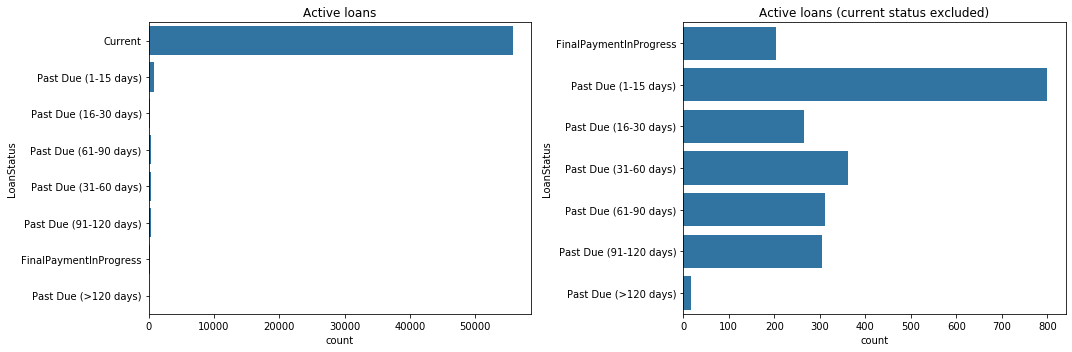

In [46]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)

# set base color for plots
base_color = sb.color_palette()[0]

sb.countplot(data = df[df.LoanStatusActive == 1], y = 'LoanStatus', color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans')

plt.subplot(1,2,2)
order = ['FinalPaymentInProgress', 'Past Due (1-15 days)', 'Past Due (16-30 days)', \
         'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)', 'Past Due (>120 days)']
sb.countplot(data = df[df.LoanStatus.isin(order)], y = 'LoanStatus', order = order, color = base_color, orient = 'h')
plt.xticks(rotation = 0)
plt.title('Active loans (current status excluded)')
plt.tight_layout();

Among active loans, the vast majority are loans without any issues, i.e. in the "current" status.<br>
Among active loans not in the current status, the highest amount is in default for 1-15 days.

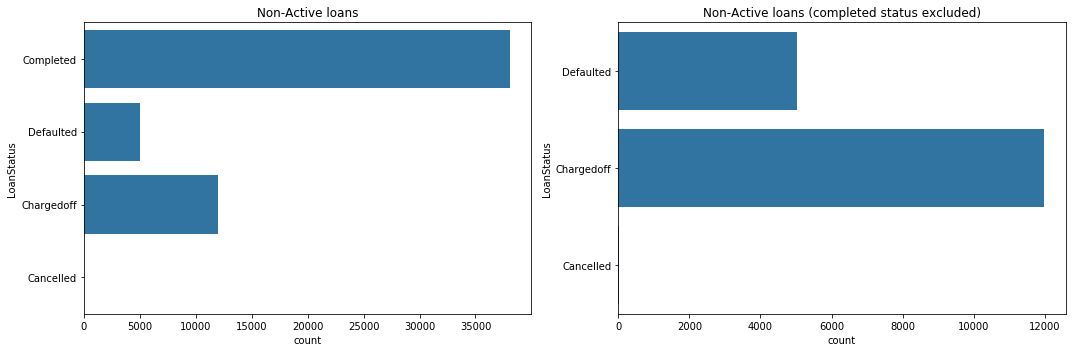

In [47]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sb.countplot(data = df[df.LoanStatusActive == 0], y = 'LoanStatus', color = base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans')

plt.subplot(1,2,2)
sb.countplot(data = df[df.LoanStatus.isin(['Defaulted', 'Chargedoff', 'Cancelled'])], y = 'LoanStatus', \
             color = base_color)
plt.xticks(rotation = 0)
plt.title('Non-Active loans (completed status excluded)')
plt.tight_layout();

Most non-active loans are in "completed" status, i.e. fully repaid.<br>
In the not-repaid group of non-active loans, there are more charged off loans (i.e. those were the chance of repayment is minimal) than defaulted ones.

In [48]:
df[df.LoanStatus == 'Chargedoff'].count()['LoanStatus'] / len(df)

0.10606382225995896

Charged off loans make 10.6% of all loans.

In [49]:
# make status an ordered categorical var
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = ['Current', 'FinalPaymentInProgress',
                                                                        'Past Due (1-15 days)', 'Past Due (16-30 days)', 
                                                                        'Past Due (31-60 days)', 'Past Due (61-90 days)', 
                                                                        'Past Due (91-120 days)', 'Past Due (>120 days)',
                                                                        'Completed', 'Defaulted', 'Chargedoff', 'Cancelled'])
df['LoanStatus'] = df['LoanStatus'].astype(ordered_var)

### Term

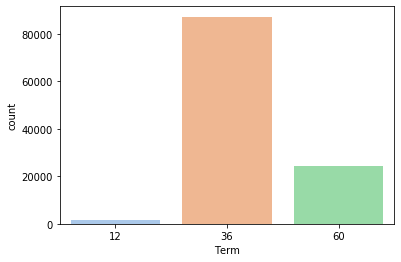

In [50]:
sb.countplot(data = df, x = 'Term', palette = 'pastel');

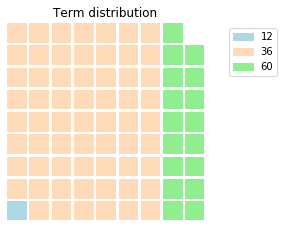

In [51]:
data = {'12': df[df['Term'] == 12].count()['Term'], 
        '36': df[df['Term'] == 36].count()['Term'], '60': df[df['Term'] == 60].count()['Term']}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=9, 
    columns=9, 
    values=data,
    figsize=(4, 4),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1.1, 1)},
    colors=("lightblue", "peachpuff", "lightgreen")
)
plt.title('Term distribution')
plt.show()

There are only 3 distinct loan terms:
1. 1 year (12 months)
2. 3 years (36 months)
3. 5 years (60 months)

The vast majority of loans is for 36 months.

### LoanOriginalAmount

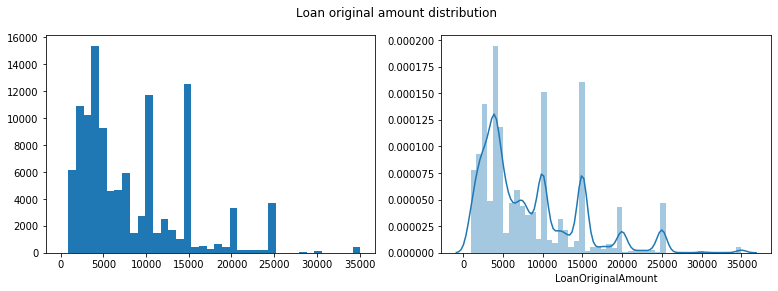

In [52]:
plt.figure(figsize=(13,4))
plt.suptitle('Loan original amount distribution')
plt.subplot(1,2,1)
bins = np.arange(0, df['LoanOriginalAmount'].max()+900, 900)
plt.hist(data = df, x = 'LoanOriginalAmount', bins = bins)

plt.subplot(1,2,2)
sb.distplot(df['LoanOriginalAmount']);

In [53]:
np.sort(df.LoanOriginalAmount.value_counts().nlargest(8).index)

array([ 2000,  3000,  4000,  5000, 10000, 15000, 20000, 25000],
      dtype=int64)

In [54]:
df.LoanOriginalAmount.value_counts().nlargest(8)

4000     14207
15000    12232
10000    10956
5000      6953
2000      6042
3000      5728
25000     3588
20000     3234
Name: LoanOriginalAmount, dtype: int64

Loan amounts are right skewed with several peaks as shown in the histogram.<br>
The most frequently loaned amount is 4000.

### MonthlyLoanPayment

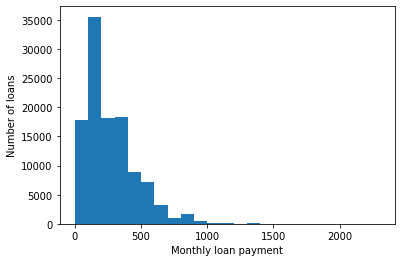

In [55]:
bins = np.arange(0, df['MonthlyLoanPayment'].max()+100, 100)
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xlabel('Monthly loan payment')
plt.ylabel('Number of loans');

In [56]:
df.MonthlyLoanPayment.mode()

0    173.71
dtype: float64

In [57]:
df.MonthlyLoanPayment.value_counts().nlargest(5)

173.71    2423
0.00       935
172.76     530
86.85      472
174.20     460
Name: MonthlyLoanPayment, dtype: int64

In [58]:
df.MonthlyLoanPayment.describe()

count    113064.000000
mean        271.936536
std         192.549541
min           0.000000
25%         130.950000
50%         217.370000
75%         370.570000
max        2251.510000
Name: MonthlyLoanPayment, dtype: float64

Monthly payment distribution is right skewed and has a long tail.<br>
Let's look at its log transformed distribution:

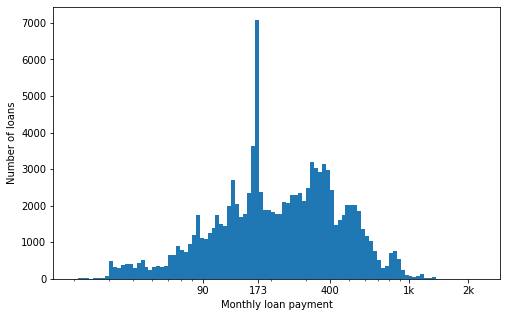

In [59]:
log_binsize = 0.02
bins = 10 ** np.arange(1.3, np.log10(df['MonthlyLoanPayment'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'MonthlyLoanPayment', bins = bins)
plt.xscale('log')
plt.xlabel('Monthly loan payment')
plt.ylabel('Number of loans')
plt.xticks([90, 173, 400, 1e3, 2e3], [90, 173, 400, '1k', '2k'])
plt.show()

Now we can see the distribution more clearly. Many loans have very low loan payments and the mode of 173 is clearly visible.

### ListingCategory

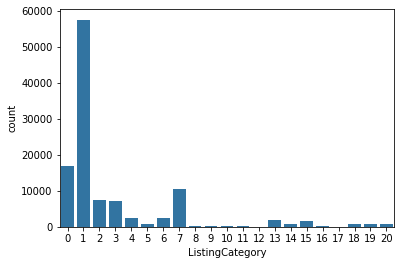

In [60]:
# keep ListingCategory as int to easily keep the same order in all plots and have legible axis labels
sb.countplot(data = df, x = 'ListingCategory', color = base_color);

The dictionary for listing categories is the following:
0. Not Available
1. Debt Consolidation
2. Home Improvement
3. Business
4. Personal Loan
5. Student Use
6. Auto
7. Other
8. Baby&Adoption
9. Boat
10. Cosmetic Procedure
11. Engagement Ring
12. Green Loans
13. Household Expenses
14. Large Purchases
15. Medical/Dental
16. Motorcycle
17. RV
18. Taxes
19. Vacation
20. Wedding Loans

By far the most loans are debt consolidation and many loans do not have a category defined.<br>
The distribution shows that ListingCategory might not be a very interesting variable for further analysis after all and if, then only in the top 5 categories. Below top 5 categories, there is a very small loan sample.

### BorrowerAPR and BorrowerRate

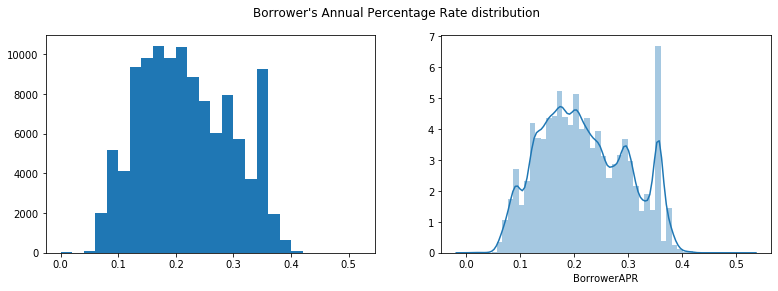

In [61]:
plt.figure(figsize=(13,4))
plt.suptitle("Borrower's Annual Percentage Rate distribution")
plt.subplot(1,2,1)
bins = np.arange(0, df.BorrowerAPR.max()+0.02, 0.02)
plt.hist(data = df, x = 'BorrowerAPR', bins = bins)
plt.subplot(1,2,2)
sb.distplot(df['BorrowerAPR']);

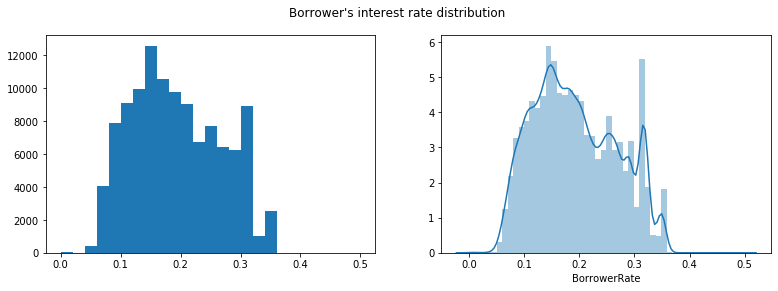

In [62]:
plt.figure(figsize=(13,4))
plt.suptitle("Borrower's interest rate distribution")
plt.subplot(1,2,1)
bins = np.arange(0, df.BorrowerRate.max()+0.02, 0.02)
plt.hist(data = df, x = 'BorrowerRate', bins = bins)
plt.subplot(1,2,2)
sb.distplot(df['BorrowerRate']);

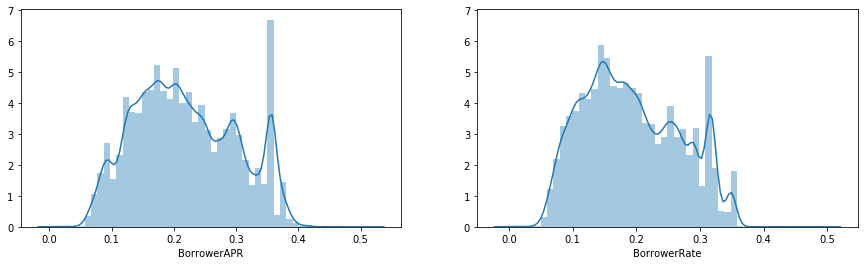

In [63]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
g = sb.distplot(df['BorrowerAPR'])
plt.subplot(1,2,2)
sb.distplot(df['BorrowerRate'])
plt.ylim(g.get_ylim());

In [64]:
df[['BorrowerAPR', 'BorrowerRate']].describe()

BorrowerAPR   BorrowerRate
count  113039.000000  113064.000000
mean        0.218982       0.192947
std         0.080483       0.074916
min         0.006530       0.000000
25%         0.156290       0.134000
50%         0.209840       0.184000
75%         0.283860       0.250600
max         0.512290       0.497500

BorrowerAPR and BorrowerRate have very similar distributions.<br>
APR rate is somewhat larger because it includes fees.

In [65]:
# the most common rates are very high, as is also seen by the peak in the histogram
df['BorrowerAPR'].value_counts().nlargest(5)

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
Name: BorrowerAPR, dtype: int64

It is somewhat suprising that 25% of loans have APR larger than 28%, which seems very high.<br>
However, looking at the very extreme end of APR 0.4, there are 68 fully repaid loans and just 34 charged-off or defaulted in this category:

In [66]:
df[(df['BorrowerAPR']>= 0.4) & (df['LoanStatus'] == 'Completed')].count()['Term']

68

In [67]:
df[(df['BorrowerAPR']>= 0.4) & ((df['LoanStatus'] == 'Defaulted') | (df['LoanStatus'] == 'Chargedoff'))].count()['Term']

34

BorrowerAPR and BorrowerRate contain the same information, let's keep just one of them and drop the other one:

In [68]:
df.drop('BorrowerRate', axis = 1, inplace = True)

### CreditGrade and ProsperRating
These two columns belong together because they are mutually separated by age of loans. We can merge these two columns to get a rating for all loans.<br>
To prove this point and look at the final rating distribution, we have to do some bivariate plotting already at this point.<br>
Further, we will create another additional column which will group the ratings into risk categories.

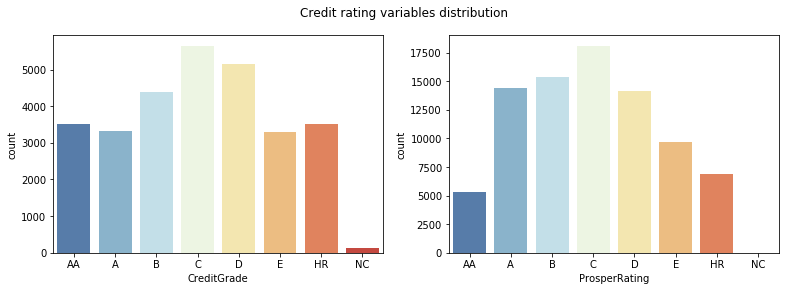

In [69]:
plt.figure(figsize=(13,4))
plt.suptitle("Credit rating variables distribution")
plt.subplot(1,2,1)
sb.countplot(data = df, x = 'CreditGrade', palette = 'RdYlBu_r')
plt.subplot(1,2,2)
sb.countplot(data = df, x = 'ProsperRating', palette = 'RdYlBu_r');

There are fewer loans with CreditGrade because it was only used until 2009 and since then, ProsperRating is used:

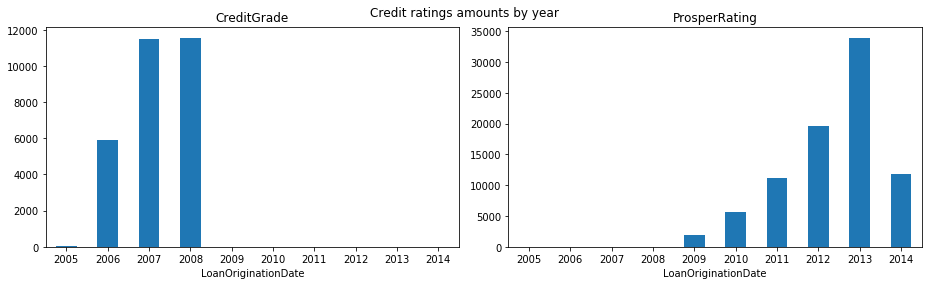

In [70]:
plt.figure(figsize=(13,4))
plt.suptitle("Credit ratings amounts by year")
plt.subplot(1,2,1)
df.groupby(df.LoanOriginationDate.dt.year).count()['CreditGrade'].plot(kind='bar')
plt.title('CreditGrade')
plt.xticks(rotation = 0)

plt.subplot(1,2,2)
df.groupby(df.LoanOriginationDate.dt.year).count()['ProsperRating'].plot(kind='bar')
plt.title('ProsperRating')
plt.xticks(rotation = 0)
plt.tight_layout();

In [71]:
# create new variable CreditRating which combines the two rating columns
df['CreditRating'] = np.where(df.CreditGrade.isnull(), df.ProsperRating, df.CreditGrade)

In [72]:
# test for correctness
df[['CreditGrade', 'ProsperRating', 'CreditRating']].sample(15)

CreditGrade ProsperRating CreditRating
LoanKey                                                       
C18E361608562401325491D         NaN             B            B
898E36905220589760F1483         NaN             E            E
D49F370068074845932209D         NaN             E            E
6E50357259015325913E4BB         NaN            AA           AA
D86436994171560029D19DC         NaN             C            C
28C9340400229221010B206           E           NaN            E
893136977367241052D685B         NaN            AA           AA
AD153375061377785C48584           C           NaN            C
A74F3700100112559D4AF3D         NaN            AA           AA
8AD033737979402480586AB           C           NaN            C
34C433873014471597AB3E7           E           NaN            E
5DAA3698161759183A266D5         NaN             C            C
148F3430591185111307B85           B           NaN            B
D4AA37029930158805FDEC5         NaN             B            B
FD7B33644729348240DD2EE           D           NaN            D

In [73]:
# make the new column CreditRating an ordinal categorical variable
df.CreditRating = df['CreditRating'].astype(pd.api.types.CategoricalDtype(ordered=True, categories = var_dict['CreditGrade']))

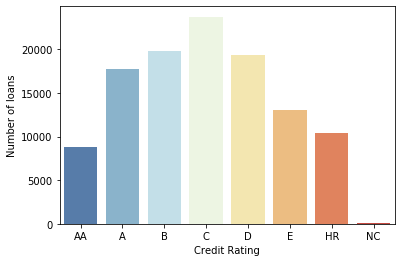

In [74]:
sb.countplot(data = df, x = 'CreditRating', palette = 'RdYlBu_r')
plt.xlabel('Credit Rating')
plt.ylabel('Number of loans');

In [75]:
# 131 loans are missing a rating
df.CreditRating.isnull().sum()

131

In [76]:
# because they did not have a rating in either CreditGrade or ProsperRating columns
df[df.CreditRating.isnull()][['LoanOriginationDate', 'CreditGrade', 'ProsperRating', 'CreditRating']].sample(5)

LoanOriginationDate CreditGrade ProsperRating  \
LoanKey                                                                 
965C3574741528517B48FD1          2009-12-16         NaN           NaN   
0BDA35626345884925A83EC          2009-07-28         NaN           NaN   
9B3536037649888496B4961          2010-11-05         NaN           NaN   
6D2535833186252175F08F8          2010-03-26         NaN           NaN   
5B1E3565441542551870016          2009-08-20         NaN           NaN   

                        CreditRating  
LoanKey                               
965C3574741528517B48FD1          NaN  
0BDA35626345884925A83EC          NaN  
9B3536037649888496B4961          NaN  
6D2535833186252175F08F8          NaN  
5B1E3565441542551870016          NaN

In [77]:
# these loans are from 2009-2010
df[df.CreditRating.isnull()][['LoanOriginationDate', 'CreditGrade', 'ProsperRating']].describe()

LoanOriginationDate CreditGrade ProsperRating
count                   131           0             0
unique                   99           0             0
top     2009-11-30 00:00:00         NaN           NaN
freq                      8         NaN           NaN
first   2009-07-22 00:00:00         NaN           NaN
last    2010-12-30 00:00:00         NaN           NaN

In [78]:
# the other two ratings columns will not be needed anymore
df.drop(['CreditGrade', 'ProsperRating'], axis=1, inplace=True)

It will also be useful to create another rating variable, which will group scores into a few riskiness categories.

In [79]:
# create new variable CreditRating which combines the two rating columns
df['CreditRisk'] = np.where(df.CreditRating.isin(['AA', 'A']), 'low',
                           np.where(df.CreditRating.isin(['B', 'C', 'D']), 'medium',
                                    np.where(df.CreditRating.isin(['E', 'HR', 'NC']), 'high', None)))

In [80]:
# test
df[['CreditRating', 'CreditRisk']].sample(5)

CreditRating CreditRisk
LoanKey                                        
D39434325241157906FA1B2            B     medium
07123584186072707FB3CDB            A        low
46CB34293810184059B03BE            A        low
B2D436152228842109ACABA            B     medium
CCE337036924778018C5147            A        low

In [81]:
# test on NaN
df[df.CreditRating.isnull()][['CreditRating', 'CreditRisk']].sample(5)

CreditRating CreditRisk
LoanKey                                        
3AAF3565209388267076BAE          NaN       None
6D2535833186252175F08F8          NaN       None
0E3D35804630391047D2500          NaN       None
0F133562741791476A19C8F          NaN       None
7E363573082201850D66D42          NaN       None

In [82]:
df.CreditRisk.isnull().sum()

131

In [83]:
# CreditRisk as ordered categorical var
ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories = ['low', 'medium', 'high'])
df['CreditRisk'] = df['CreditRisk'].astype(ordered_var)

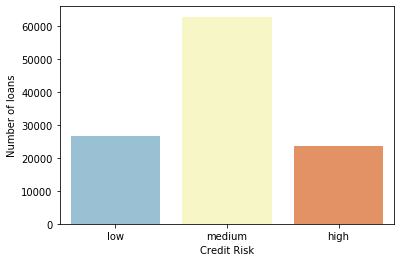

In [84]:
sb.countplot(data = df, x = 'CreditRisk', palette = 'RdYlBu_r')
plt.xlabel('Credit Risk')
plt.ylabel('Number of loans');

There are similar amounts of low and high risk loans with the majority if all loans being of medium risk.

### CreditScoreRangeLower and CreditScoreRangeUpper
We will look at these two variables together to compare the gap between them.

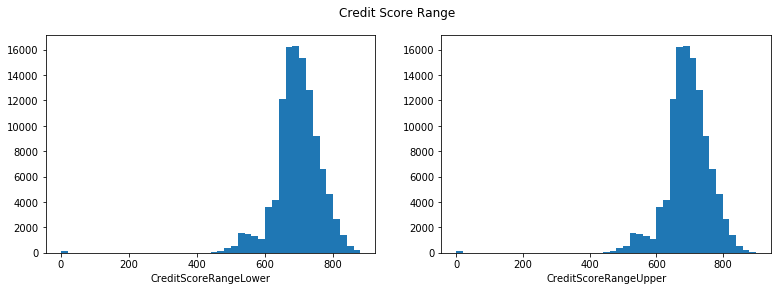

In [85]:
plt.figure(figsize=(13,4))
plt.suptitle("Credit Score Range")
plt.subplot(1,2,1)
bins_lower = np.arange(0, df.CreditScoreRangeLower.max()+20, 20)
plt.hist(data = df, x = 'CreditScoreRangeLower', bins = bins_lower)
plt.xlabel('CreditScoreRangeLower')
plt.subplot(1,2,2)
bins_upper = np.arange(0, df.CreditScoreRangeUpper.max()+20, 20)
plt.hist(data = df, x = 'CreditScoreRangeUpper', bins = bins_upper)
plt.xlabel('CreditScoreRangeUpper');

In [86]:
df[['CreditScoreRangeLower', 'CreditScoreRangeUpper']].describe()

CreditScoreRangeLower  CreditScoreRangeUpper
count          112473.000000          112473.000000
mean              685.524882             704.524882
std                66.636364              66.636364
min                 0.000000              19.000000
25%               660.000000             679.000000
50%               680.000000             699.000000
75%               720.000000             739.000000
max               880.000000             899.000000

The two distributions are very similar and this is because the range buckets are not large (they are of size 20) and here are all the existing buckets listed:

In [87]:
df.groupby(['CreditScoreRangeLower', 'CreditScoreRangeUpper'])['LoanOriginationDate'].count()

CreditScoreRangeLower  CreditScoreRangeUpper
0.0                    19.0                       133
360.0                  379.0                        1
420.0                  439.0                        5
440.0                  459.0                       36
460.0                  479.0                      141
480.0                  499.0                      346
500.0                  519.0                      554
520.0                  539.0                     1593
540.0                  559.0                     1474
560.0                  579.0                     1357
580.0                  599.0                     1125
600.0                  619.0                     3601
620.0                  639.0                     4172
640.0                  659.0                    12099
660.0                  679.0                    16176
680.0                  699.0                    16315
700.0                  719.0                    15315
720.0                  739.0         

All information will be kept even when we drop one of the columns and work just with the other one:

In [88]:
df.drop('CreditScoreRangeUpper', axis = 1, inplace = True)

### IncomeRange

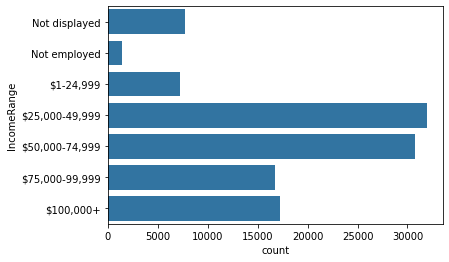

In [89]:
sb.countplot(data = df, y = 'IncomeRange', color = base_color)
plt.xticks(rotation = 0);

We can see two large groups in the loans: mid earners on the one hand (25k - 75k) making the majority of loans, and high earners group (75k+) on the other. 

### IncomeVerifiable

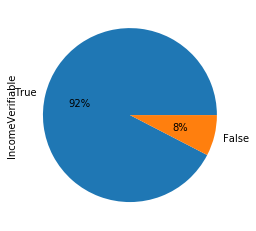

In [90]:
df.IncomeVerifiable.value_counts().plot(kind='pie', autopct='%1.0f%%');

Majority of loans have borrowers with a verifiable income.

### StatedMonthlyIncome

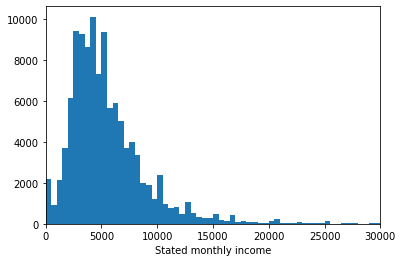

In [91]:
# monthly income is very right skewed
bins = np.arange(0, 30500, 500)
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xlabel('Stated monthly income')
plt.xlim((0,30000));

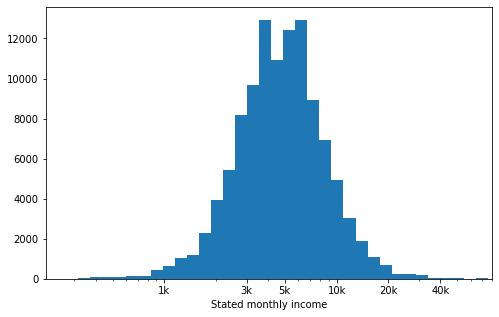

In [92]:
log_binsize = 0.07
bins = 10 ** np.arange(2.5, np.log10(df['StatedMonthlyIncome'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'StatedMonthlyIncome', bins = bins)
plt.xscale('log')
plt.xticks([1000, 3000, 5000, 10000, 20000, 40000], ['1k', '3k', '5k', '10k', '20k', '40k'])
plt.xlim((0,80000))
plt.xlabel('Stated monthly income')
plt.show()

Given the very skewed distribution of stated monthly income, we transformed the scale. The distribution looks normal after the transformation.

In [93]:
df.StatedMonthlyIncome.describe()

count    1.130640e+05
mean     5.605142e+03
std      7.495656e+03
min      0.000000e+00
25%      3.199521e+03
50%      4.666667e+03
75%      6.825000e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

Some borrowers have very high stated monthly income of over 90k.<br>
These outliers might be errors, but we cannot be sure, so we don't delete them.

In [94]:
df[df.StatedMonthlyIncome > 90000][['IncomeVerifiable', 'CreditRisk', 'LoanStatus', 'EmploymentStatus', 'IncomeRange']].sample(5)

IncomeVerifiable CreditRisk  LoanStatus  \
LoanKey                                                            
04DF3672370940669E7B16B             False     medium   Completed   
3D5836438779123523A2DA1             False       high     Current   
ABFC358335339485700883A              True     medium   Completed   
C7963686536898613C60349              True     medium   Completed   
2DE533983085546702B368E              True     medium  Chargedoff   

                        EmploymentStatus IncomeRange  
LoanKey                                               
04DF3672370940669E7B16B    Self-employed   $100,000+  
3D5836438779123523A2DA1    Self-employed   $100,000+  
ABFC358335339485700883A        Full-time   $100,000+  
C7963686536898613C60349         Employed   $100,000+  
2DE533983085546702B368E        Full-time   $100,000+

In [95]:
df.StatedMonthlyIncome.value_counts().nlargest(5)

4166.666667    3486
5000.000000    3367
3333.333333    2889
3750.000000    2399
5416.666667    2351
Name: StatedMonthlyIncome, dtype: int64

### DebtToIncomeRatio

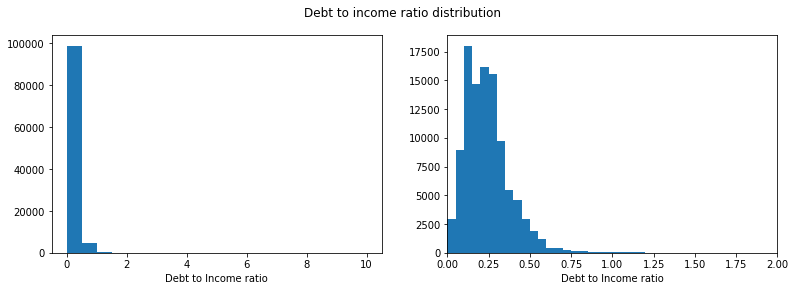

In [96]:
plt.figure(figsize=(13,4))
plt.suptitle('Debt to income ratio distribution')
plt.subplot(1,2,1)
bins = np.arange(0, 10.5, 0.5)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income ratio')

plt.subplot(1,2,2)
bins = np.arange(0, 2.05, 0.05)
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xlim((0,2))
plt.xlabel('Debt to Income ratio');

In [97]:
df.DebtToIncomeRatio.describe()

count    104593.000000
mean          0.276032
std           0.553740
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

Debt to income ratio is very right skewed with bulk of values around 0.2. Let's transform the scale to look at the distribution in detail:

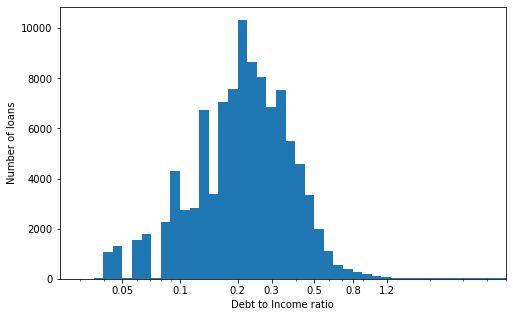

In [98]:
log_binsize = 0.05
bins = 10 ** np.arange(-1.5, np.log10(df['DebtToIncomeRatio'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'DebtToIncomeRatio', bins = bins)
plt.xscale('log')
plt.xticks([0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2], [0.05, 0.1, 0.2, 0.3, 0.5, 0.8, 1.2])
plt.xlim((0,5))
plt.xlabel('Debt to Income ratio')
plt.ylabel('Number of loans')
plt.show()

### EmploymentStatus

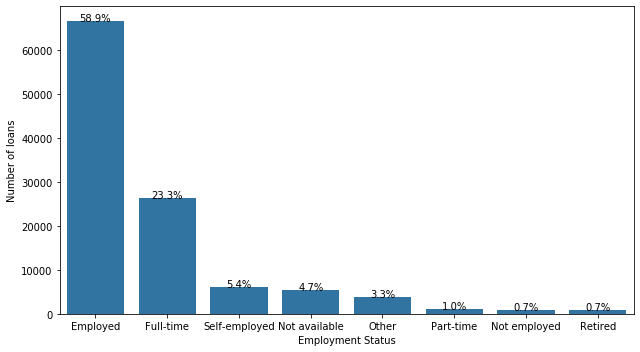

In [99]:
plt.figure(figsize=[9, 5])
status_counts = df['EmploymentStatus'].value_counts()
status_order = status_counts.index
max_count = status_counts[0]
max_prop = max_count / df.shape[0]
tick_props = np.arange(0, max_prop, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]

g = sb.countplot(data = df, x = 'EmploymentStatus', color = base_color, order = status_order)
plt.xticks(rotation = 0)
plt.xlabel('Employment Status')
plt.ylabel('Number of loans')


# values must be ordered from the largest for this to work
for i in range(status_counts.shape[0]):
    count = status_counts[i]
    pct_string = '{:0.1f}%'.format(100 * count / df.shape[0])
    plt.text(i, count+10, pct_string, ha = 'center')

plt.tight_layout();

Majority of borrowers are employed.

### IsBorrowerHomeowner

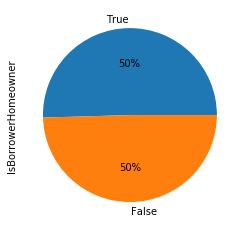

In [100]:
df.IsBorrowerHomeowner.value_counts().plot(kind='pie', autopct='%1.0f%%');

Exactly half of loans belongs to a borrower who is a home owner.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

* I created a new credit rating variable. This was done by merging two existing rating variables which were mutually exclusive by the loan origination date. I further created a credit risk variable which categorizes the rating into three groups: low, medium, or high risk.
* Loan original amount is multimodal, with the most popular loaned amounts being 4k, 15k and 10k.
* From the two similar interest rates variables, I chose the borrower annual percentage rate.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

* I deleted two loans which had their closed date earlier than the loan origination date.<br>
* I reduced the number of income ranges by one by merging USD 0 with Not Employed into the same category.<br> 
* I also created an active loans dummy to be able to quickly filter all active or non-active loan statuses from the data.<br>
* I further looked at a couple of right skewed variables using a logarithmic scale to better see where the bulk of the data points lie.

## Bivariate Exploration

In [101]:
numeric_vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower',
                'StatedMonthlyIncome', 'DebtToIncomeRatio', 'MonthsToClosed', 'Term']
bool_vars = ['LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']
ordered_categoric_vars = ['IncomeRange', 'CreditRisk', 'CreditRating']

### Numeric variables

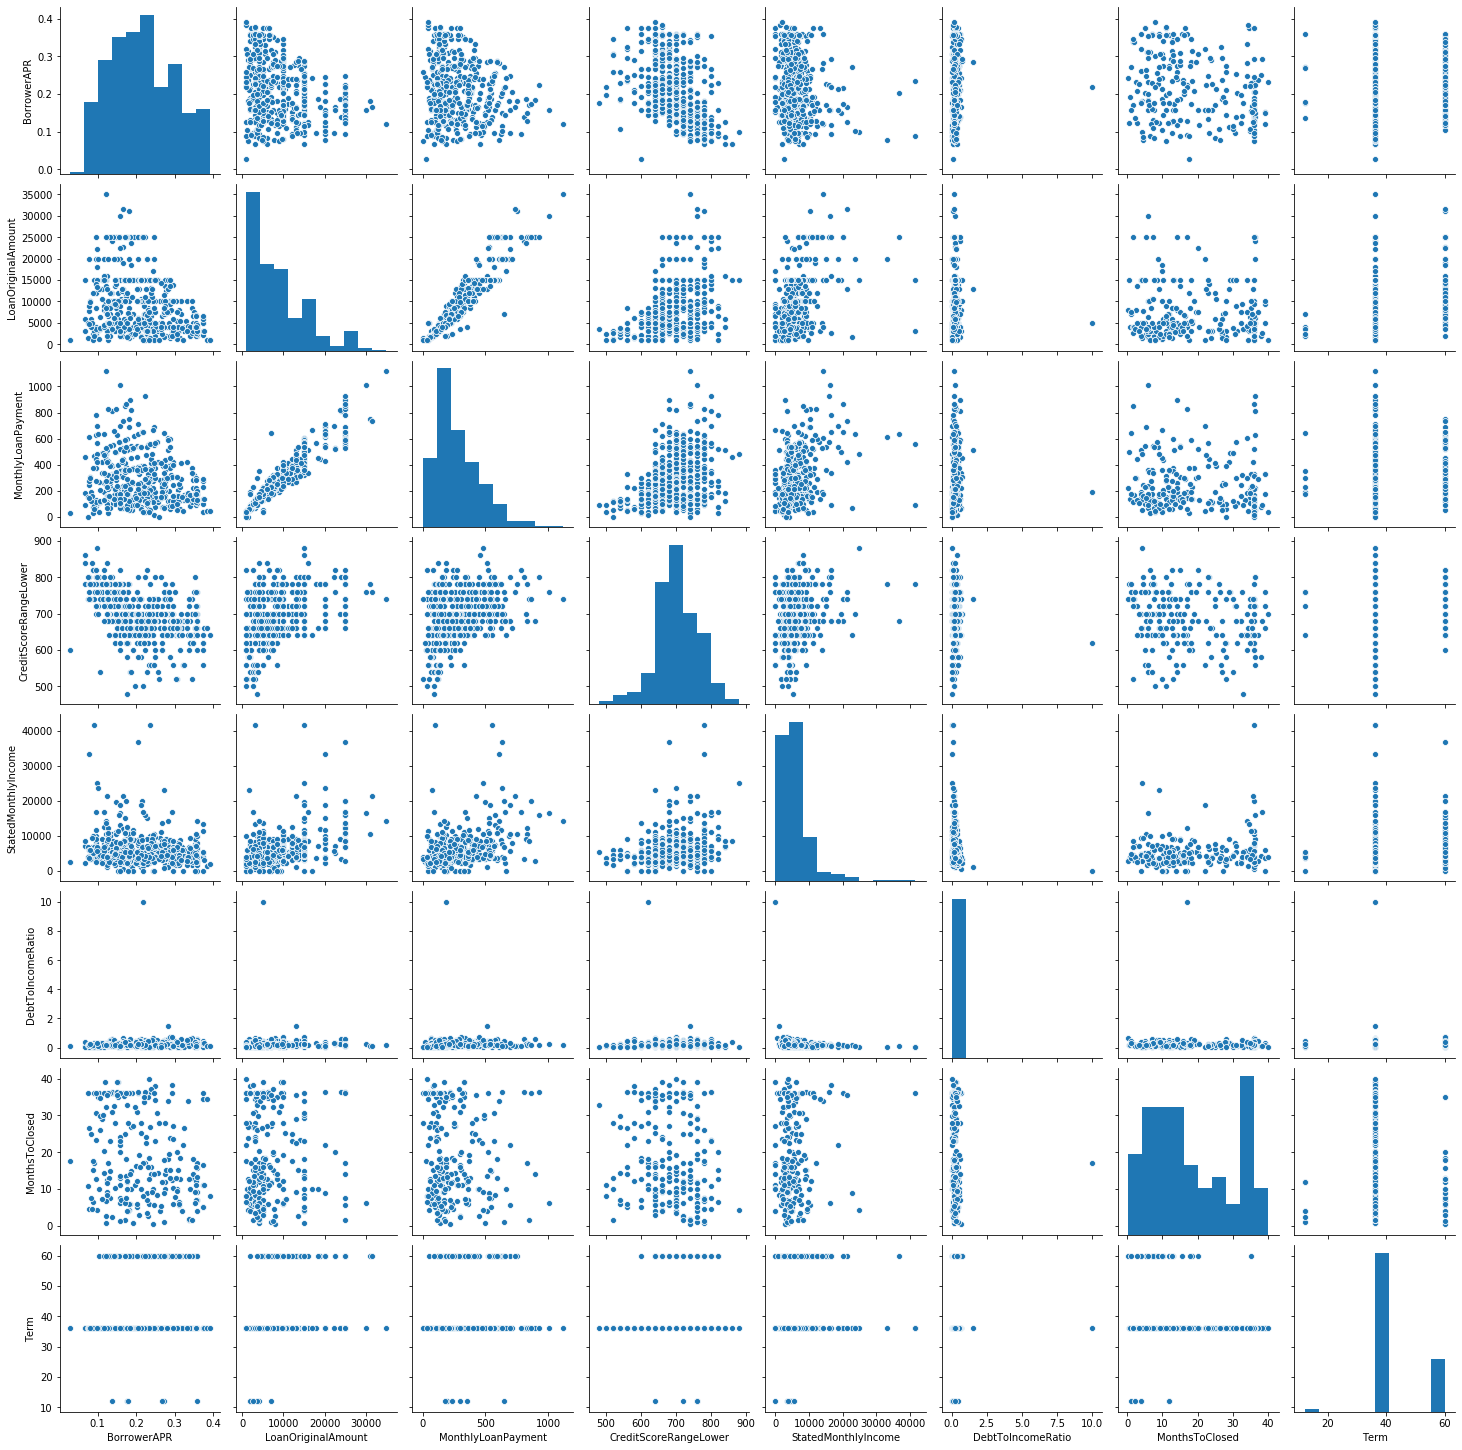

In [102]:
# pairplot of numeric vars to see relationships overview on a sample of data for faster rendering
sample = np.random.choice(df.shape[0], 500, replace = False)
df_samp = df.iloc[sample,:]
sb.pairplot(df_samp, vars = numeric_vars);

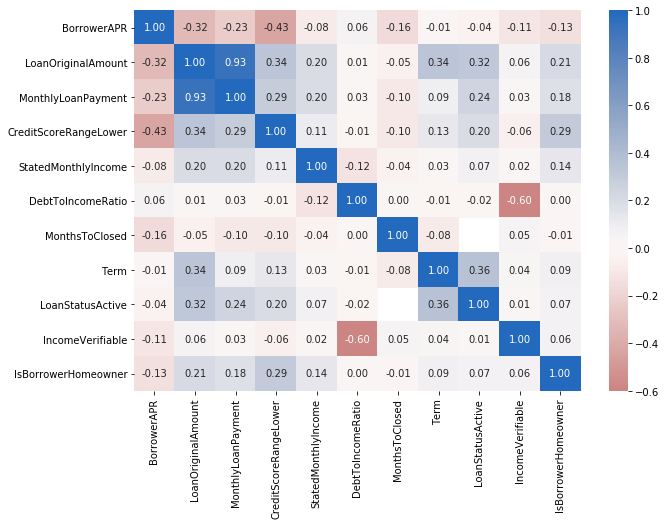

In [103]:
# correlations
plt.figure(figsize = [10, 7])
sb.heatmap(df[['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower', 'StatedMonthlyIncome', \
              'DebtToIncomeRatio', 'MonthsToClosed', 'Term', 'LoanStatusActive', 'IncomeVerifiable', 'IsBorrowerHomeowner']]\
           .corr(), annot = True, fmt = '.2f',
           cmap = 'vlag_r', center = 0)
plt.show()

The dependent variables of our interest are **BorrowerAPR**, the borrower annual percentage rate, and **LoanOriginalAmount**, i.e. the borrowed amount.<br>
Based on the correlations, we will look into the following relationships of dependent variables:
* BorrowerAPR - LoanOriginalAmount
* BorrowerAPR - MonthlyLoanPayment
* BorrowerAPR - CreditScoreRangeLower
* LoanOriginalAmount - MonthlyLoanPayment
* LoanOriginalAmount - CreditScoreRangeLower

Further, we see that borrowers with a verifiable income tend to have a lower debt to income ratio and that active loans are on average for a longer period, higher amounts and higher monthly payments than non-active loans.

Relationships of interest:

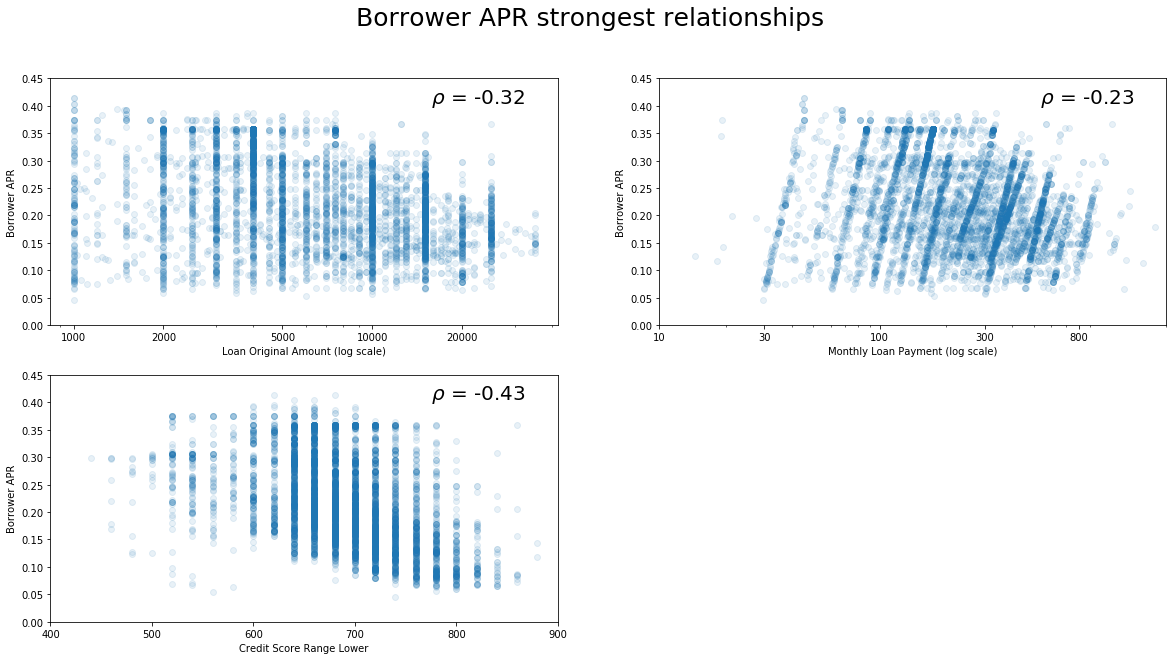

In [104]:
# a sample of 5000 from the data
sample = np.random.choice(df.shape[0], 5000, replace = False)
df_samp = df.iloc[sample,:]

plt.figure(figsize = (20,10))
plt.subplot(2,2,1)
g = plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/10)
plt.xscale('log')
plt.xlabel('Loan Original Amount (log scale)')
plt.ylabel('Borrower APR')
plt.ylim((0,0.45))
plt.xticks([1000, 2000, 5000, 10000, 20000], [1000, 2000, 5000, 10000, 20000])
# display the correlation
ax = plt.gca()
coef = df[['LoanOriginalAmount', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.subplot(2,2,2)
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', alpha = 1/10)
plt.xscale('log')
plt.xlabel('Monthly Loan Payment (log scale)')
plt.ylabel('Borrower APR')
plt.xticks([10, 30, 100, 300, 800], [10, 30, 100, 300, 800])
plt.xlim((0,2000))
plt.ylim((0,0.45))
# display the correlation
ax = plt.gca()
coef = df[['MonthlyLoanPayment', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.subplot(2,2,3)
plt.scatter(data = df_samp, x = 'CreditScoreRangeLower', y = 'BorrowerAPR', alpha = 1/10)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Borrower APR')
plt.xlim((400, 900))
plt.ylim((0,0.45))
# display the correlation
ax = plt.gca()
coef = df[['CreditScoreRangeLower', 'BorrowerAPR']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.75, 0.9), size = 20, xycoords = ax.transAxes)

plt.suptitle('Borrower APR strongest relationships', size = 25);

The negative correlations of BorrowerAPR and loan original amount, monthly loan payment and credit score range lower are somewhat visible from the scatter plots and they all make logical sense.

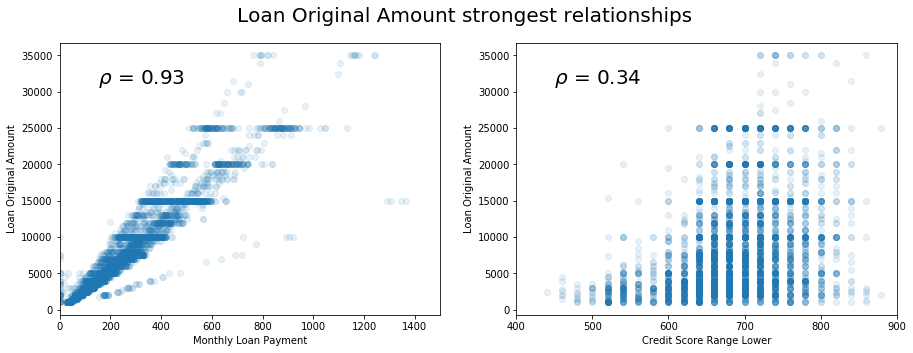

In [105]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.ylabel('Loan Original Amount')
plt.xlabel('Monthly Loan Payment')
plt.xlim((0,1500))
# display the correlation
ax = plt.gca()
coef = df[['MonthlyLoanPayment', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)

plt.subplot(1,2,2)
plt.scatter(data = df_samp, x = 'CreditScoreRangeLower', y = 'LoanOriginalAmount', alpha = 1/10)
plt.xlabel('Credit Score Range Lower')
plt.ylabel('Loan Original Amount')
plt.xlim((400,900))
# display the correlation
ax = plt.gca()
coef = df[['CreditScoreRangeLower', 'LoanOriginalAmount']].corr().iloc[1,0]
label = r'$\rho$ = ' + str(round(coef, 2))
ax.annotate(label, xy = (0.1, 0.85), size = 20, xycoords = ax.transAxes)
plt.suptitle('Loan Original Amount strongest relationships', size = 20);

The positive correlation of loan original amount with monthly loan payment and credit score range lower is clear from the plots and makes logical sense, too.<br>
Displaying monthly payment on a logarithmic scale shows the quadratic relationship with loan original amount.

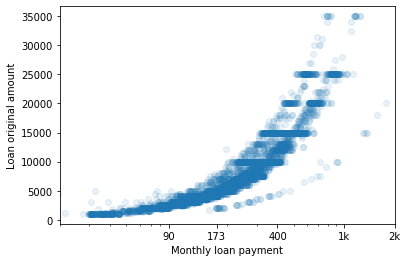

In [106]:
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/10)
plt.ylabel('Loan original amount')
plt.xlabel('Monthly loan payment')
plt.xlim((20,2000))
plt.xscale('log')
plt.xticks([90, 173, 400, 1e3, 2e3], [90, 173, 400, '1k', '2k']);

Next, let's look at relationships of categorical variables with the dependent variables.

### Categorical variables

<Figure size 1080x720 with 0 Axes>

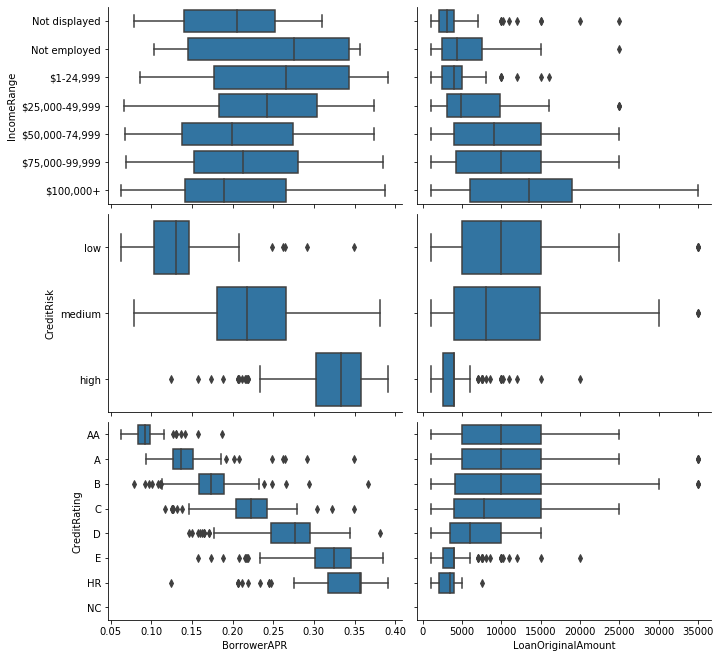

In [107]:
# sample of 2000
samples = np.random.choice(df.shape[0], 1000, replace = False)
df_samp = df.iloc[samples,:]

def boxgrid(x, y, **kwargs):
    """ Function for creating box plots with seaborn's PairGrid. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x, y, color = default_color)

plt.figure(figsize = [15, 10])
g = sb.PairGrid(data = df_samp, x_vars = ['BorrowerAPR', 'LoanOriginalAmount'], y_vars = ordered_categoric_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

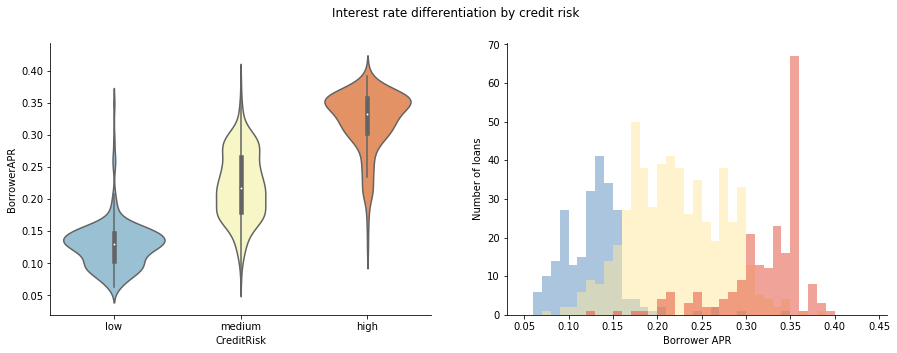

In [108]:
plt.figure(figsize = (15,5))
plt.suptitle('Interest rate differentiation by credit risk')

plt.subplot(1,2,1)
# subplots do not work when using catplot+violin kind
sb.violinplot(data=df_samp, x="CreditRisk", y="BorrowerAPR", palette = 'RdYlBu_r')
sb.despine()

plt.subplot(1,2,2)
bins = np.arange(0.05, 0.45,0.01)
plt.hist(df_samp[df_samp['CreditRisk']=='low']['BorrowerAPR'], alpha = 0.5, color = sb.color_palette('RdYlBu_r')[0], bins = bins)
plt.hist(df_samp[df_samp['CreditRisk']=='medium']['BorrowerAPR'], alpha = 0.5, color = sb.color_palette('RdYlBu_r')[3], bins = bins)
plt.hist(df_samp[df_samp['CreditRisk']=='high']['BorrowerAPR'], alpha = 0.5, color = sb.color_palette('RdYlBu_r')[5], bins = bins)
sb.despine()
plt.xlabel('Borrower APR')
plt.ylabel('Number of loans')

plt.show();

<Figure size 720x1440 with 0 Axes>

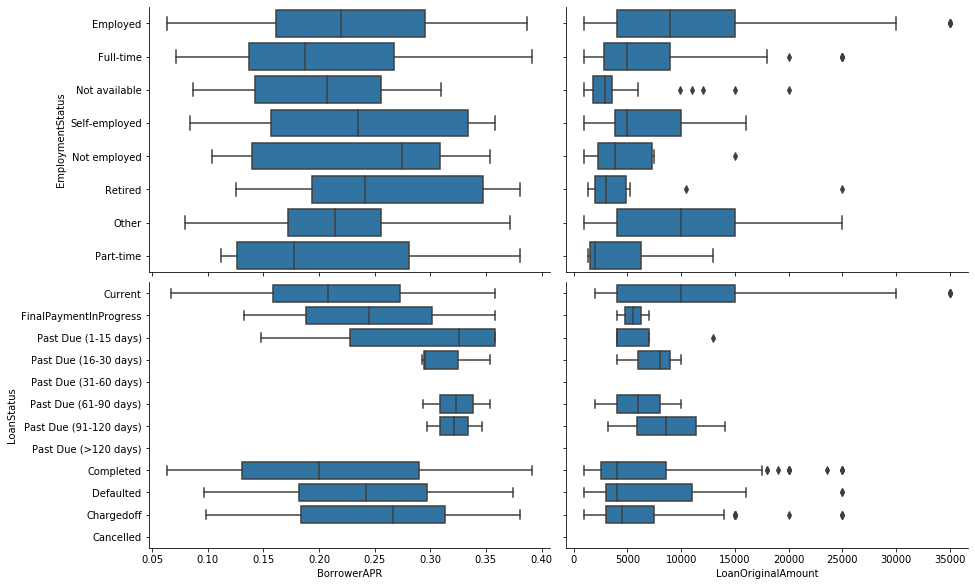

In [109]:
plt.figure(figsize = [10, 20])
g = sb.PairGrid(data = df_samp, x_vars = ['BorrowerAPR', 'LoanOriginalAmount'], y_vars = ['EmploymentStatus', 'LoanStatus'],
                size = 4, aspect = 1.5)
g.map(boxgrid)
plt.show();

<Figure size 720x720 with 0 Axes>

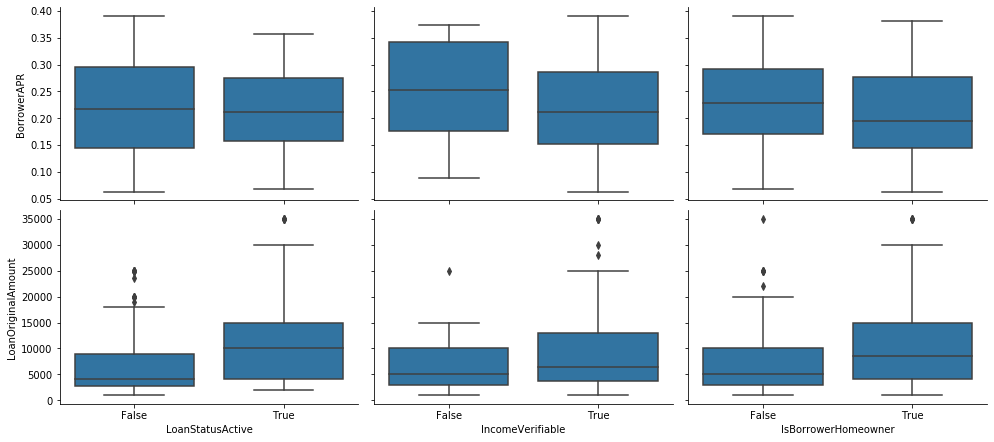

In [110]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = bool_vars,
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

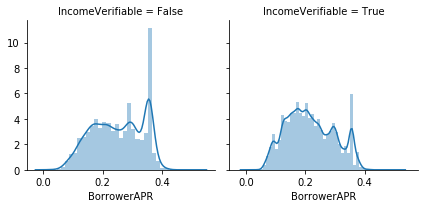

In [111]:
g = sb.FacetGrid(data = df, col = 'IncomeVerifiable')
g.map(sb.distplot, 'BorrowerAPR');

Borrowers with a verifiable income benefit from lower rate.

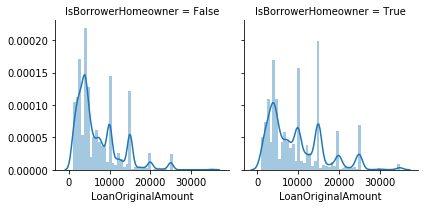

In [112]:
g = sb.FacetGrid(data = df, col = 'IsBorrowerHomeowner')
g.map(sb.distplot, 'LoanOriginalAmount');

Borrowers who own home get higher loan amounts.

<Figure size 720x720 with 0 Axes>

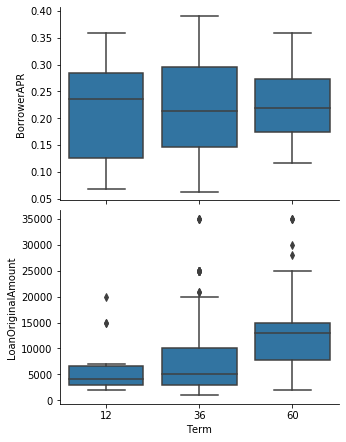

In [113]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = numeric_vars[-1:],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

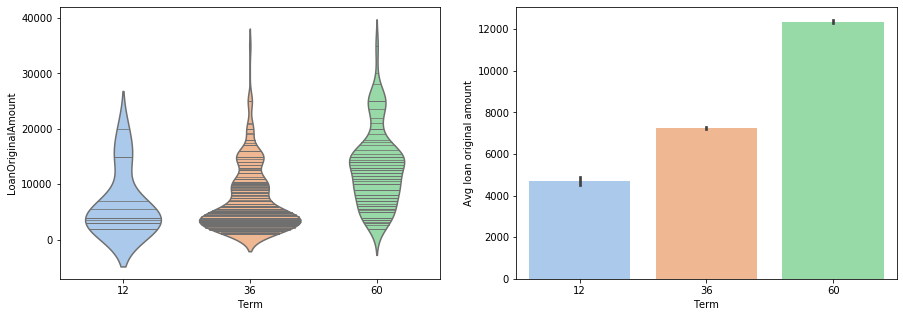

In [114]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
g1 = sb.violinplot(data=df_samp, x="Term", y="LoanOriginalAmount", inner='stick', palette = 'pastel')

plt.subplot(1,2,2)
g2 = sb.barplot(data = df, x = 'Term', y = 'LoanOriginalAmount', palette = 'pastel')
plt.ylabel('Avg loan original amount')
plt.show();

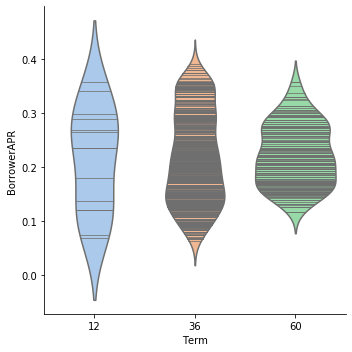

In [115]:
sb.catplot(x="Term", y="BorrowerAPR", kind="violin", inner='stick', data=df_samp, palette = 'pastel');

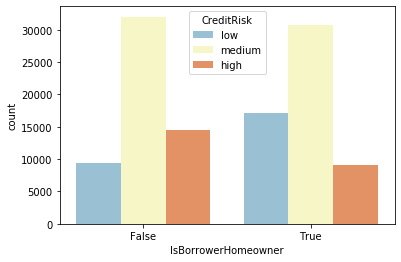

In [116]:
sb.countplot(data = df, x = 'IsBorrowerHomeowner', hue = 'CreditRisk', palette = 'RdYlBu_r');

There are more high risk borrowers among those who do not own a house.

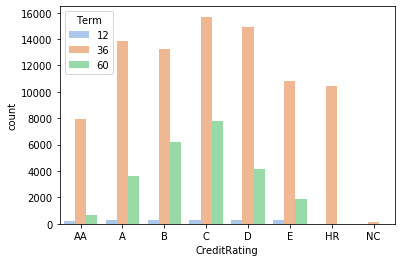

In [117]:
# most loans are for 36m and the most common rating is C
sb.countplot(data = df, x = 'CreditRating', hue = 'Term', palette = 'pastel');

The above box plots reveal the following (none of which is actually too surprising and it is what we would expect from a reasonable lending strategy):
* Interest rate decreases and borrowed amount increases with higher income of the borrower
* The more risky the loan, the higher the interest rate and the lower the borrowed amount
* Loans with a higher interest default more (active loans: past due statuses vs. current loans, non-active loans: defaulted/chargedoff vs. completed loans)
* Active loans are for larger loan amounts than non-active loans
* Home owners pay a lower interest and borrow higher amounts
* Unemployed borrowers pay the highest interest
* Employed borrowers borrow the highest amounts
* Higher loan amounts are borrowed for longer term

Let's very briefly also look at other numeric vars than BorrowerAPR and LoanOriginalAmount:

<Figure size 720x720 with 0 Axes>

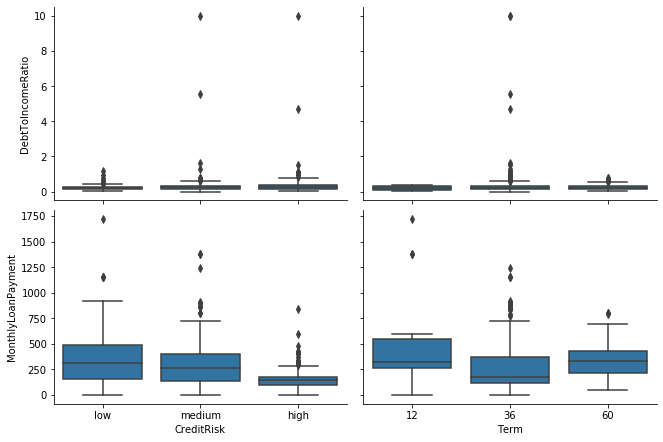

In [118]:
plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_samp, y_vars = ['DebtToIncomeRatio', 'MonthlyLoanPayment'], x_vars = ['CreditRisk', 'Term'],
                size = 3, aspect = 1.5)
g.map(boxgrid)
plt.show()

The squeezed debt to income ration box plots tell us that there are many outliers in the data with very high ratios.<br>
High risk borrowers have lower monthly payments compared to other risk categories.

### Other categorical variables

<Figure size 720x1080 with 0 Axes>

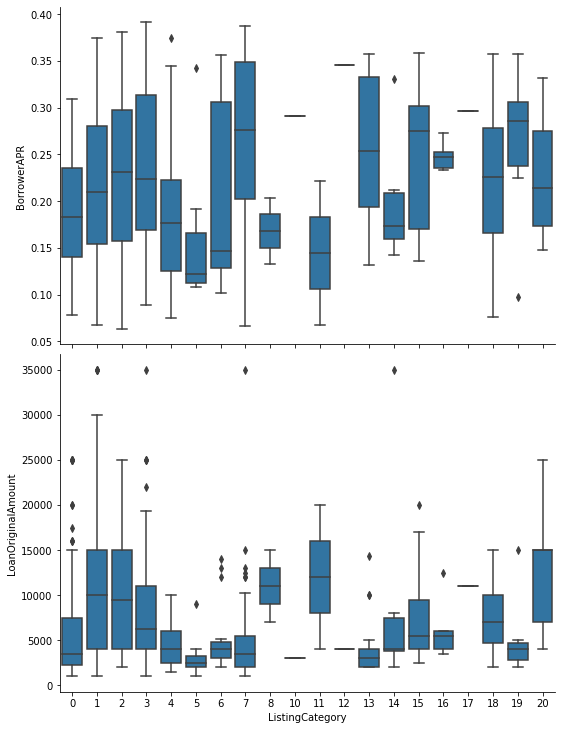

In [119]:
plt.figure(figsize = [10, 15])
g = sb.PairGrid(data = df_samp, y_vars = ['BorrowerAPR', 'LoanOriginalAmount'], x_vars = 'ListingCategory',
                size = 5, aspect = 1.5)
g.map(boxgrid)
plt.xticks(rotation = 0)
plt.show();

Many of the listing category groups are small, hence the long whiskers.<br>

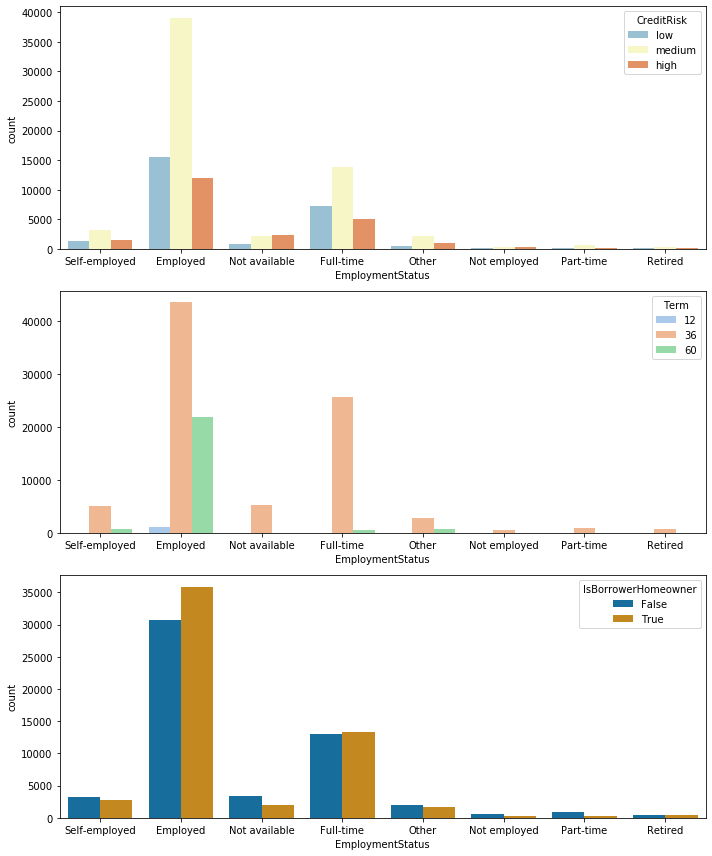

In [120]:
plt.figure(figsize = [10,12])

plt.subplot(3,1,1)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'CreditRisk', palette = 'RdYlBu_r')

plt.subplot(3,1,2)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'Term', palette = 'pastel')

plt.subplot(3,1,3)
sb.countplot(data = df, x = 'EmploymentStatus', hue = 'IsBorrowerHomeowner', palette = 'colorblind')

plt.tight_layout();

* employed borrowers get loans with term 60 much more frequently than other groups
* employed borrowers are the only group with strongly more home-owners among them

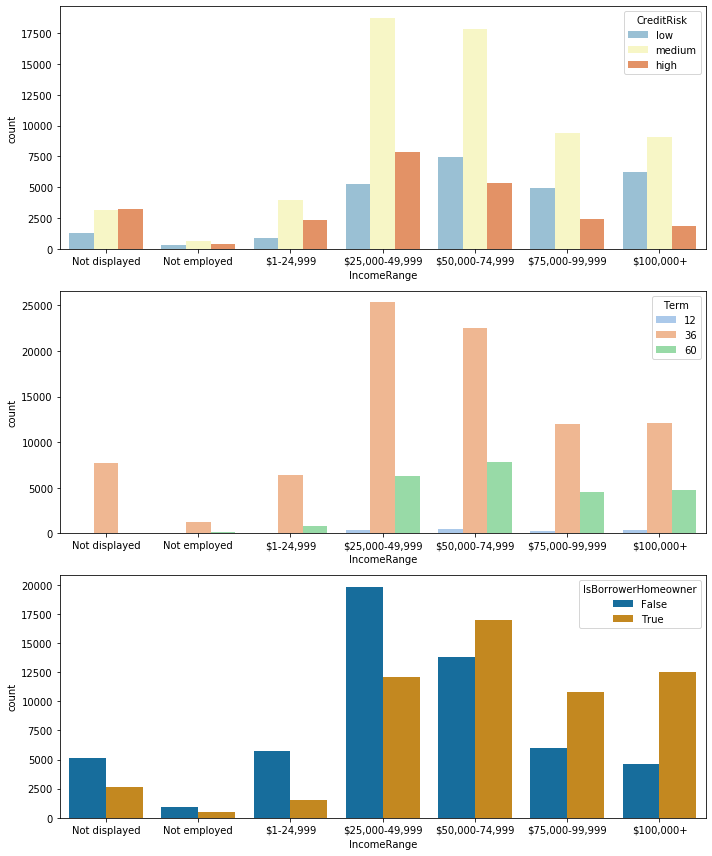

In [121]:
plt.figure(figsize = [10,12])

plt.subplot(3,1,1)
sb.countplot(data = df, x = 'IncomeRange', hue = 'CreditRisk', palette = 'RdYlBu_r')

plt.subplot(3,1,2)
sb.countplot(data = df, x = 'IncomeRange', hue = 'Term', palette = 'pastel')

plt.subplot(3,1,3)
sb.countplot(data = df, x = 'IncomeRange', hue = 'IsBorrowerHomeowner', palette = 'colorblind')

plt.tight_layout();

* there are high risk borrowers even among the high earners
* but the share of low risk borrowers among the top earners is of course higher than in other income groups

### Development in time

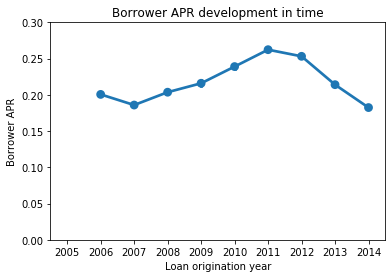

In [122]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR')
plt.title('Borrower APR development in time')
plt.ylabel('Borrower APR')
plt.xlabel('Loan origination year')
plt.ylim((0,0.3));

* average interest rate is in decline since 2012

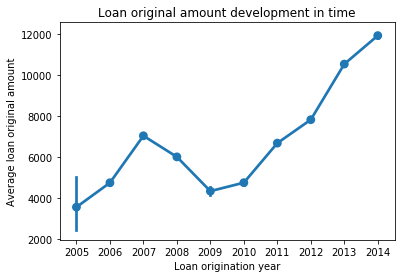

In [123]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount')
plt.title('Loan original amount development in time')
plt.ylabel('Average loan original amount')
plt.xlabel('Loan origination year');

* average loan amoounts are increasing since 2010

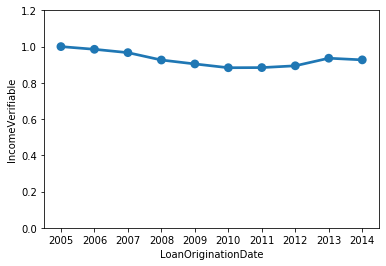

In [124]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'IncomeVerifiable')
plt.ylim((0,1.2));

* share of borrowers with verified income is slightly decreasing in time

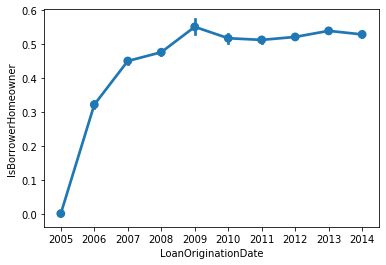

In [125]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'IsBorrowerHomeowner');

* share of borrowers who own a home is quite steady since 2010

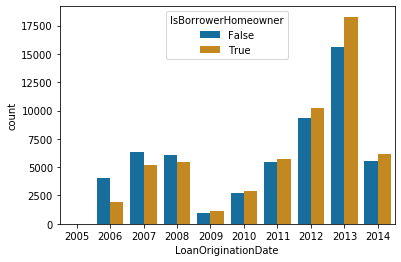

In [126]:
sb.countplot(data = df, x = df['LoanOriginationDate'].dt.year, hue = 'IsBorrowerHomeowner', palette = 'colorblind');

* the same information can be shown also this way

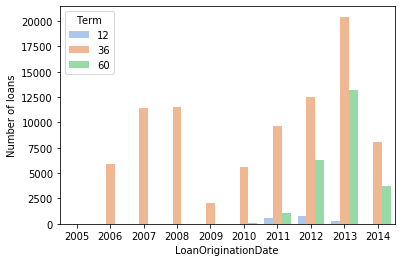

In [127]:
sb.countplot(data = df, x = df['LoanOriginationDate'].dt.year, hue = 'Term', palette = 'pastel')
plt.ylabel('Number of loans')
plt.legend(title = 'Term', loc = 'upper left');

* 60m term was introduced first in 2010

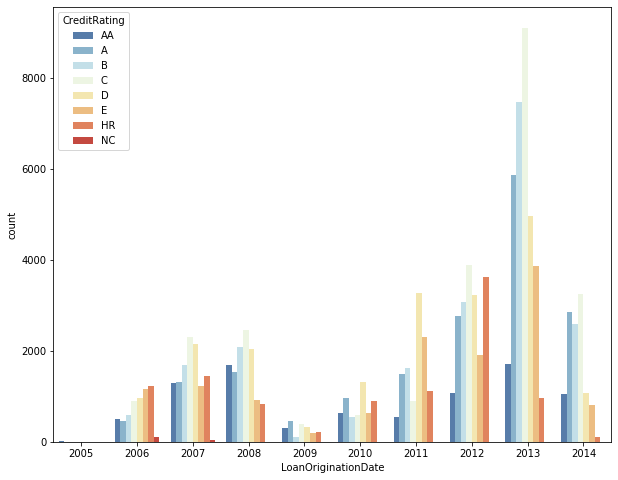

In [128]:
plt.figure(figsize = [10,8])
sb.countplot(data = df, x = df['LoanOriginationDate'].dt.year, hue = 'CreditRating', palette = 'RdYlBu_r');

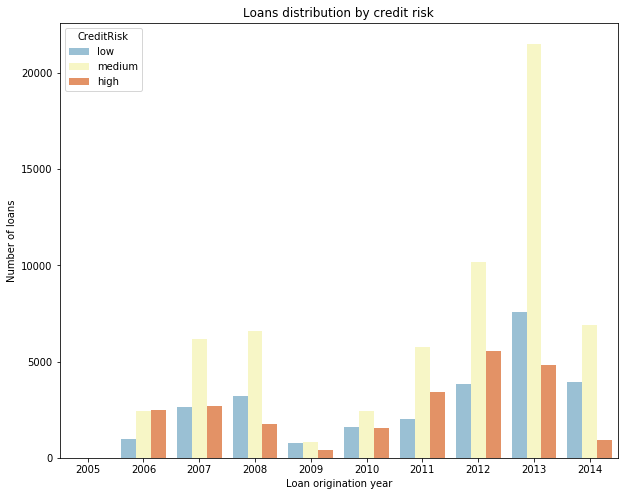

In [129]:
plt.figure(figsize = [10,8])
sb.countplot(data = df, x = df['LoanOriginationDate'].dt.year, hue = 'CreditRisk', palette = 'RdYlBu_r')
plt.xlabel('Loan origination year')
plt.ylabel('Number of loans')
plt.title('Loans distribution by credit risk');

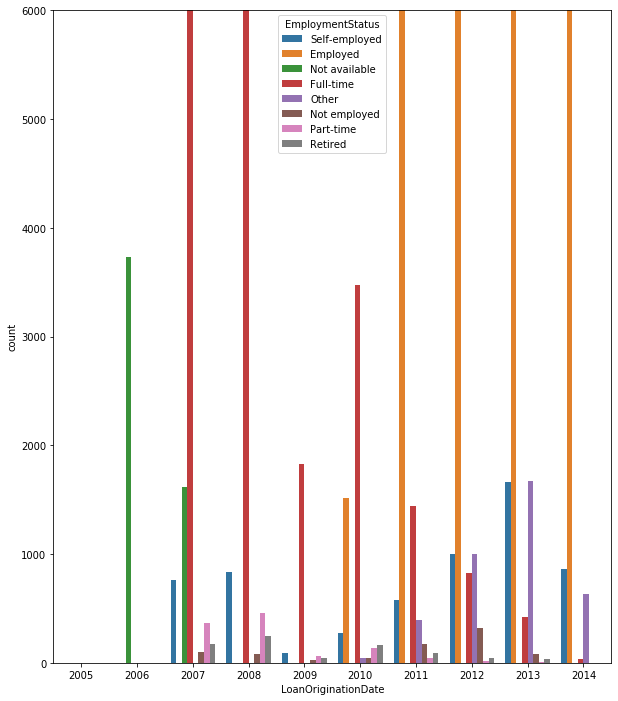

In [130]:
plt.figure(figsize = [10,12])
sb.countplot(data = df, x = df['LoanOriginationDate'].dt.year, hue = 'EmploymentStatus')
plt.ylim((0,6000));

* employed category was introduced in 2010, apparently as a successor of full-time category, but the full-time number is decreasing gradually in the following years
* not available category was only in 2006 and 2007

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Borrower APR is negatively correlated with the loan original amount, monthly loan payment and credit score range lower, all of which makes sense. If you can borrow larger amounts, you are likely a more solvent borrower, therefore you get a lower interest rate and you have a higher credit score and can afford and be allowed to pay higher monthly payments.<br>
This interconnectedness of the main features is also shown by the positive correlation between loan original amount with monthly loan payment and with credit score.<br>
The credit rating clearly separates borrowers into different interest rate groups, which is exactly what we would expect from a reasonable lending business. Many of the variables included in the full dataset are inputs for calculating the credit rating, some of which we are still investigating in this analysis. The purpose of all this data about borrowers should lead to an appropriate rating based on which he can get an appropriate interest rate and other loan details (amount, monthly payment, term). High risk borrowers for example get loans for much lower amounts than medium or low risk borrowers.   

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

* Higher income borrowers and home owners borrow higher amounts for lower rates compared with lower income borrowers.
* Loans with a higher interest default more often.
* Unemployed borrowers pay the highest interest among all employment statuses.
* Higher loan amounts are borrowed for longer term.

## Multivariate Exploration

This section will build on previous findings and combine multiple variables to see how they interact.<br>
A few sections will follow, each focusing on one variable and its relationship with others.
### Credit risk

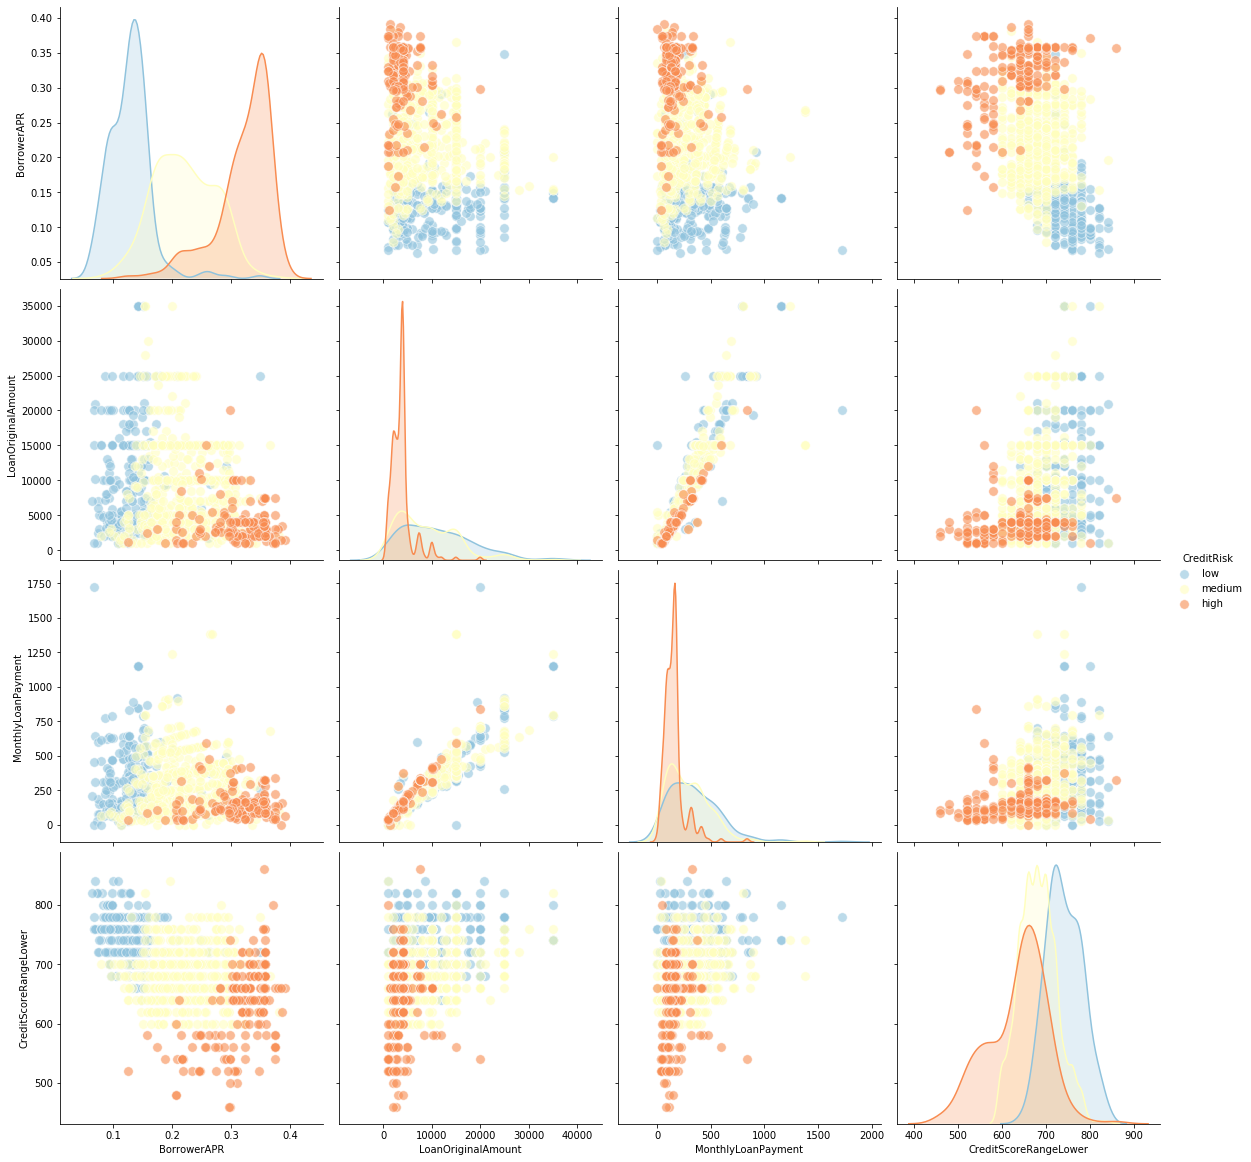

In [131]:
# Pair plot colored by credit risk
sb.pairplot(df_samp, 
             vars = ['BorrowerAPR', 'LoanOriginalAmount', 'MonthlyLoanPayment', 'CreditScoreRangeLower'], 
             hue = 'CreditRisk', diag_kind = 'kde', palette = 'RdYlBu_r',
             plot_kws = {'alpha': 0.6, 's': 90},
             size = 4);

Credit risk groups are clearly separated in our featured variables.

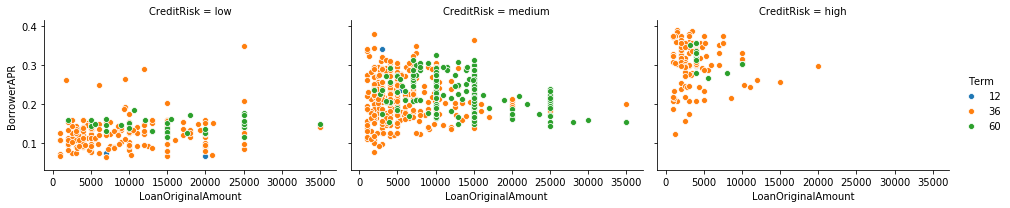

In [132]:
g = sb.FacetGrid(data = df_samp, col = 'CreditRisk', hue = 'Term',
                size = 3, aspect = 1.5)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.show();

The rising interest rate among risk groups is visible, as well as the 60m loans having a rather higher interest rate than 36m loans on average in all risk groups.

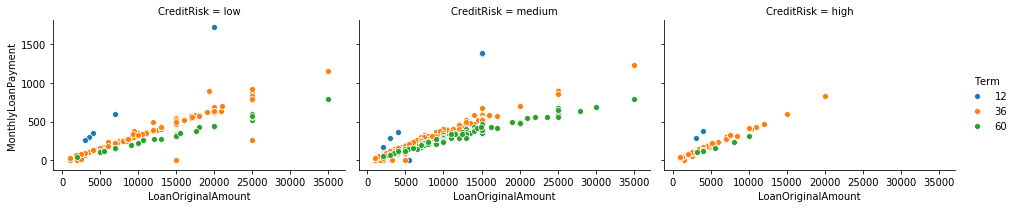

In [133]:
g = sb.FacetGrid(data = df_samp, col = 'CreditRisk', hue = 'Term',
                size = 3, aspect = 1.5)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'MonthlyLoanPayment')
g.add_legend()
plt.show()

It is clear that for the same loan amount, the monthly payments differ mostly by the term of the loan.<br>
It shows also that we have most borrowers in the medium risk category and that high risk borrowers cannot borrow very high loan amounts.

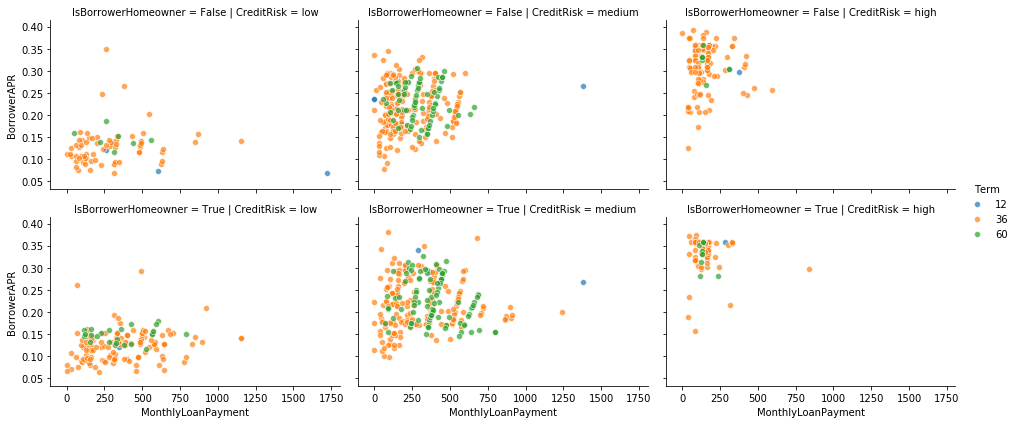

In [134]:
g = sb.FacetGrid(data = df_samp, col = 'CreditRisk', row = 'IsBorrowerHomeowner', hue = 'Term',
                size = 3, aspect = 1.5)
g.map(sb.scatterplot, 'MonthlyLoanPayment', 'BorrowerAPR', alpha = 0.7)
g.add_legend()
plt.show();

Owning a home does not seem to make a huge difference in interest rate and monthly payments when separating by both credit risk and loan term.<br>
However, we can see that in low risk group, there are more homeowners that non-home owners, whereas the opposite is true for the high risk group.

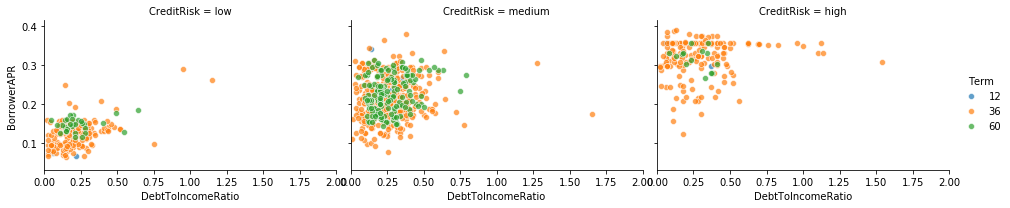

In [135]:
# it is interesting how the 60m loans appear in the center of distributions
g = sb.FacetGrid(data = df_samp, col = 'CreditRisk', hue = 'Term',
                size = 3, aspect = 1.5)
g.map(sb.scatterplot, 'DebtToIncomeRatio', 'BorrowerAPR', alpha = 0.7)
plt.xlim((0,2))
g.add_legend()
plt.show();

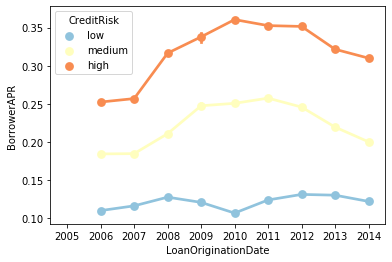

In [136]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'CreditRisk', palette = 'RdYlBu_r');

In [137]:
df_rate_dev = df.groupby(['LoanYear', 'CreditRisk'])['BorrowerAPR'].mean()
df_rate_dev = pd.DataFrame(df_rate_dev) # created with multiindex
df_rate_dev.reset_index(inplace=True)

In [138]:
fig = px.bar(df_rate_dev,
             y="CreditRisk",
             x="BorrowerAPR",
             animation_frame="LoanYear",
             animation_group="BorrowerAPR",
             orientation='h',
             color="CreditRisk",
             range_x=[0, df_rate_dev.BorrowerAPR.max()+0.05],
             color_continuous_scale=px.colors.diverging.RdYlBu)
# improve aesthetics (size, grids etc.)
fig.update_layout(width=700,
                  height=500,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  title_text='Evolution of Borrower APR by credit risk',
                  showlegend=False)

fig.update_xaxes(title_text='Average Borrower APR')
fig.update_yaxes(title_text='Credit Risk')
fig.show()

The interest rate differentiation for the risk group is very clear and quite large.<br>
The average interest rate is declining for high and medium risk groups in the last couple of years, but this is not the case for low risk group.

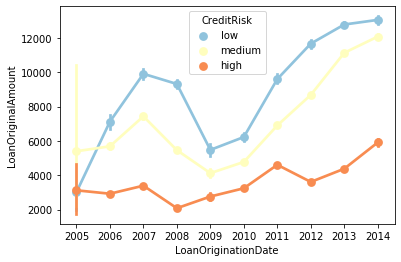

In [139]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'CreditRisk', palette = 'RdYlBu_r');

* the riskier the borrower, the lower the amount which he can borrow and this holds true over time

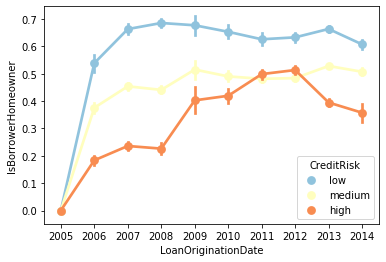

In [140]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'IsBorrowerHomeowner', hue = 'CreditRisk', palette = 'RdYlBu_r');

* the riskier the borrower, the less likely he is to own a house in general and this holds true over the years

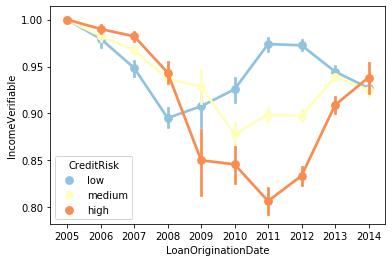

In [141]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'IncomeVerifiable', hue = 'CreditRisk', palette = 'RdYlBu_r');

There is an interesting shift where in the beginning of business, the riskiest borrowers apparently had to have a verified income more often than the safer borrower groups, but this is no longer the case since 2009 and the high risk group also has the lowest share of verifiable income.<br>
<br>
There are very clear differences among the credit risk groups, which is a good sign. Let's follow with looking if this still holds as clearly in the more detailed credit rating variable.
### Credit rating

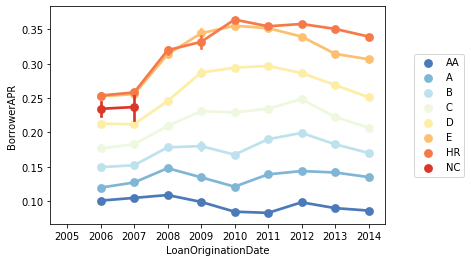

In [142]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'CreditRating', palette = 'RdYlBu_r')
plt.legend(loc = 'right', bbox_to_anchor=(1.25, 0.5), ncol=1);

* the difference in average interest rate in the worst ratings E and HR seems to be notable only in the last 3 years

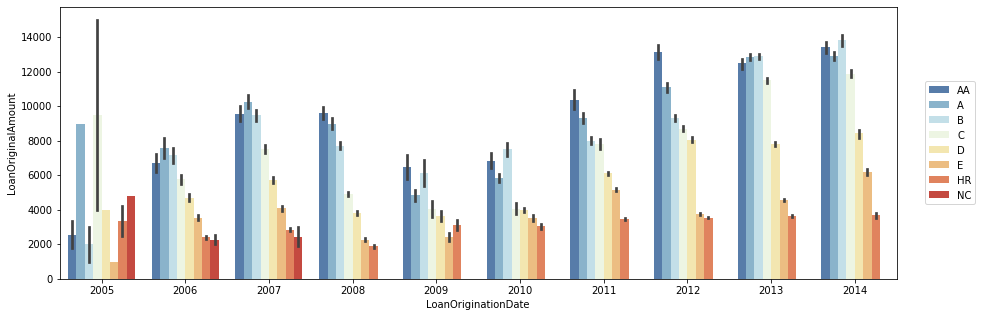

In [143]:
plt.figure(figsize=(15,5))
sb.barplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'CreditRating', palette = 'RdYlBu_r')
plt.legend(loc = 'right', bbox_to_anchor=(1.1, 0.5), ncol=1);

* loan amounts increase in time across categories, most notably the loan original amounts in C rating are getting closer to those of higher ratings

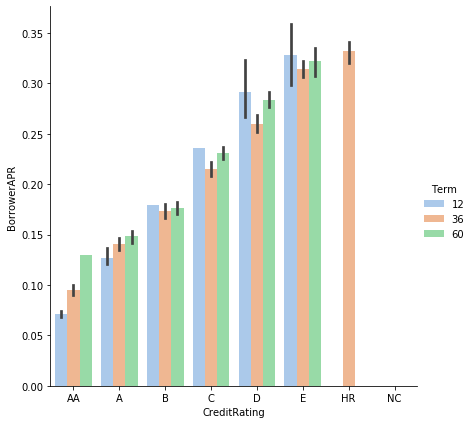

In [144]:
sb.catplot(x = 'CreditRating', y = 'BorrowerAPR', hue = 'Term', kind = 'bar', data = df_samp, size = 6, palette = 'pastel');

* for AA and A ratings, 60m loans have the highest interest rate
* for B ratings, 12m and 60m bear a very similar interest rate
* for worse than B ratings, 12m loan is actually more expensive than 60m loan
* the worst rating can only borrow for 36 months

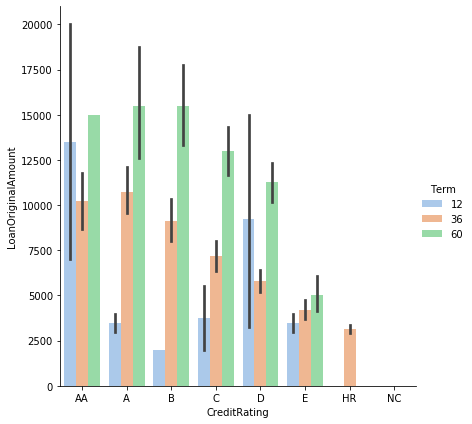

In [145]:
sb.catplot(x = 'CreditRating', y = 'LoanOriginalAmount', hue = 'Term', kind = 'bar', data = df_samp, size = 6,\
           palette = 'pastel');

* for 36m loan, the most common term, it is very clear that the worse the rating, the lower the borrowed amount

### Is Borrower a Homeowner

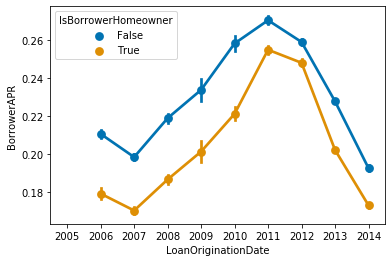

In [146]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', \
             palette = 'colorblind');

* borrowers who do not own a house pay a higher interest and this holds throughout the years

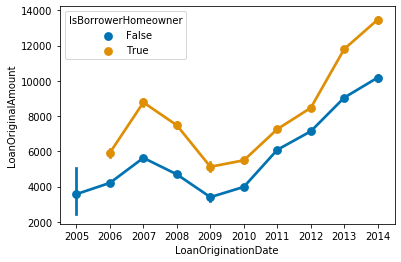

In [147]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'IsBorrowerHomeowner', \
             palette = 'colorblind');

* borrowers with a house borrow more money on average and this is true in all years

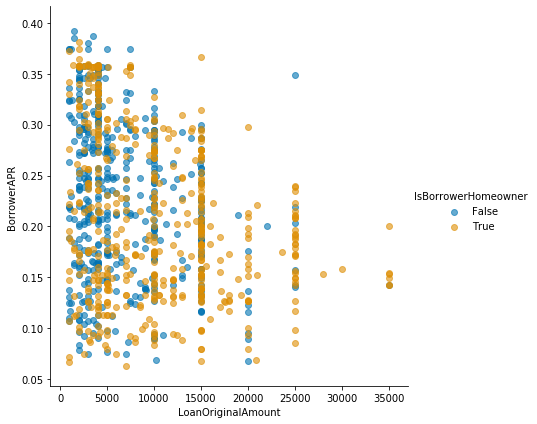

In [148]:
g = sb.FacetGrid(data = df_samp, hue = 'IsBorrowerHomeowner', size = 6, palette = 'colorblind')
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR', alpha = 0.6)
g.add_legend()
plt.show()

* home owners more frequently borrow higher amounts

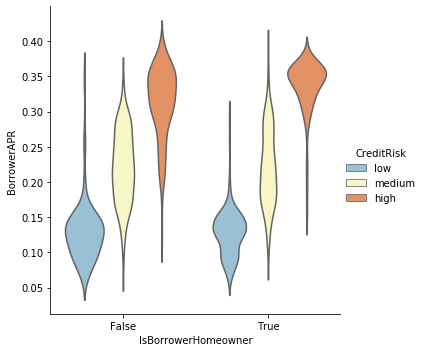

In [149]:
sb.catplot(x="IsBorrowerHomeowner", y="BorrowerAPR", hue="CreditRisk",
            kind="violin", inner=None,
            palette="RdYlBu_r", data=df_samp);

* once assigned a risk level, a home ownership does not make too much difference in the average interest rate in that risk group

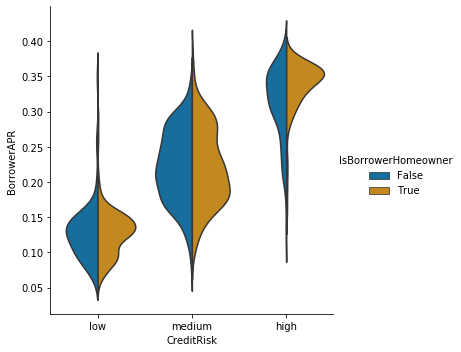

In [150]:
# the same is also visible here
sb.catplot(x="CreditRisk", y="BorrowerAPR", hue="IsBorrowerHomeowner",
            kind="violin", inner=None, split=True,
            palette="colorblind", data=df_samp);

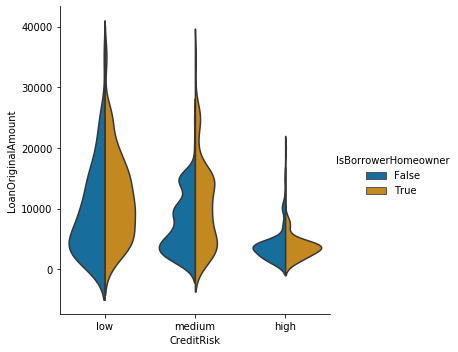

In [151]:
sb.catplot(x="CreditRisk", y="LoanOriginalAmount", hue="IsBorrowerHomeowner",
            kind="violin", inner=None, split=True,
            palette="colorblind", data=df_samp);

* there are more non-home owners borrowing lower amounts (< 10k) in low and medium risk groups than home-owners

### Income range

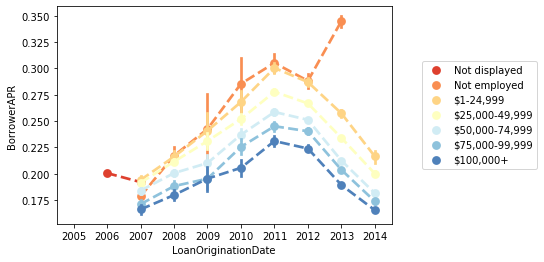

In [152]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'IncomeRange', palette = 'RdYlBu',\
             linestyles = '--')
plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5), ncol=1);

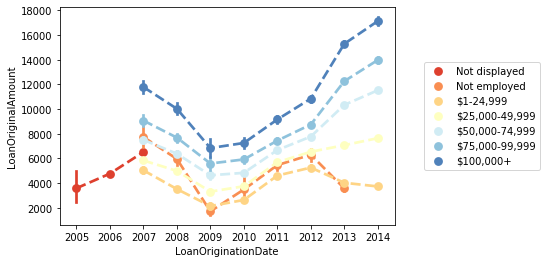

In [153]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'LoanOriginalAmount', hue = 'IncomeRange', \
             palette = 'RdYlBu', linestyles = '--')
plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5), ncol=1);

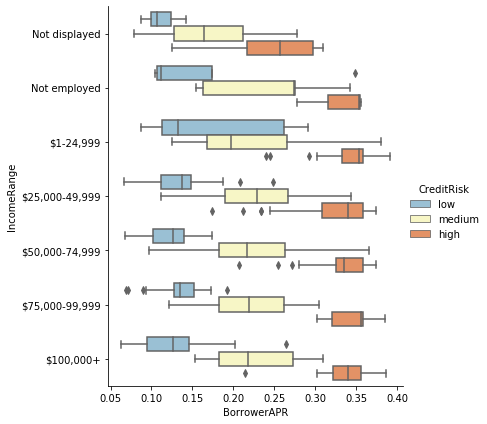

In [154]:
sb.catplot(y = 'IncomeRange', x = 'BorrowerAPR', hue = 'CreditRisk', kind = 'box', data = df_samp, size = 6, palette = 'RdYlBu_r');

* once assigned into a risk category, income range does not seem to matter much (it was one of the inputs for deciding about the the risk category, so if someone is high risk even with 100k+ income, then this income does not give him lower rates anymore)

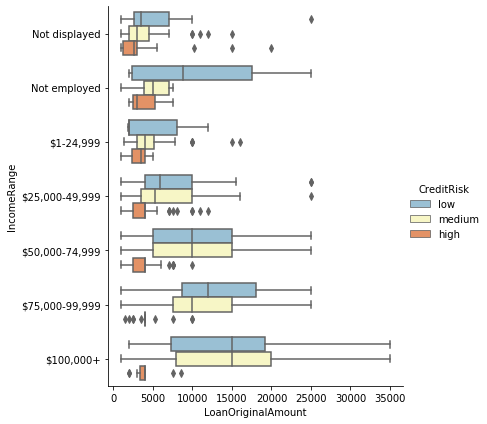

In [155]:
sb.catplot(y = 'IncomeRange', x = 'LoanOriginalAmount', hue = 'CreditRisk', kind = 'box', data = df_samp, size = 6, palette = 'RdYlBu_r');

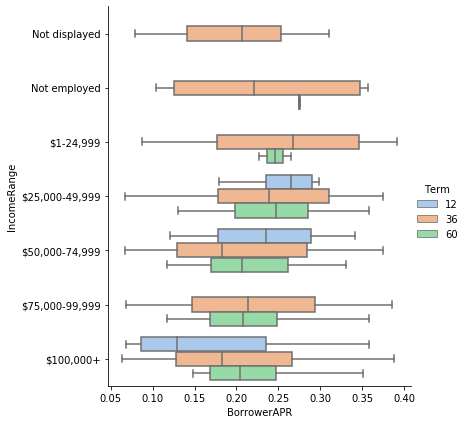

In [156]:
sb.catplot(y = 'IncomeRange', x = 'BorrowerAPR', hue = 'Term', kind = 'box', data = df_samp, size = 6, palette = 'pastel');

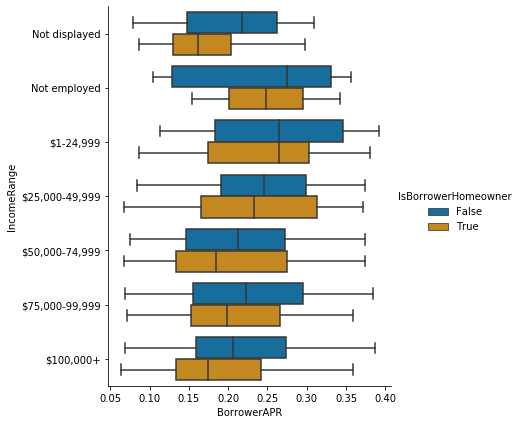

In [157]:
sb.catplot(y = 'IncomeRange', x = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', kind = 'box', data = df_samp, size = 6, \
           palette = 'colorblind');

### Borrower APR and Loan Original Amount

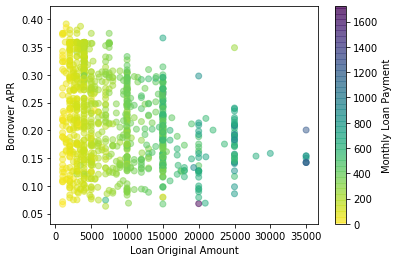

In [158]:
plt.scatter(data = df_samp, x = 'LoanOriginalAmount', y = 'BorrowerAPR', alpha = 1/2, c = 'MonthlyLoanPayment', \
            cmap = 'viridis_r')
plt.colorbar(label = 'Monthly Loan Payment')
plt.ylabel('Borrower APR')
plt.xlabel('Loan Original Amount')
plt.show()

* higher loan amounts have lower interest rate and higher monthly payments

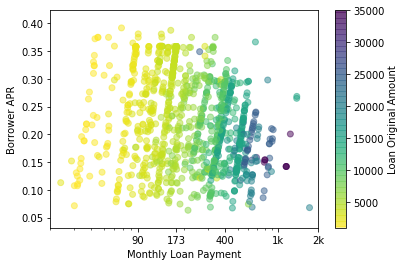

In [159]:
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', alpha = 1/2, c = 'LoanOriginalAmount', \
            cmap = 'viridis_r')
plt.colorbar(label = 'Loan Original Amount')
plt.ylabel('Borrower APR')
plt.xlabel('Monthly Loan Payment')
plt.xlim((20,2000))
plt.xscale('log')
plt.xticks([90, 173, 400, 1e3, 2e3], [90, 173, 400, '1k', '2k'])
plt.show()

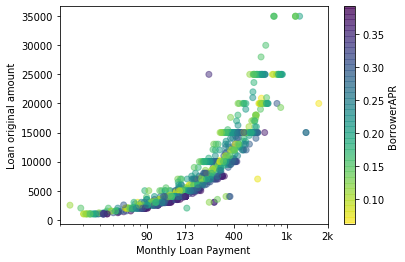

In [160]:
plt.scatter(data = df_samp, x = 'MonthlyLoanPayment', y = 'LoanOriginalAmount', alpha = 1/2, c = 'BorrowerAPR', \
            cmap = 'viridis_r')
plt.colorbar(label = 'BorrowerAPR')
plt.ylabel('Loan original amount')
plt.xlabel('Monthly Loan Payment')
plt.xlim((20,2000))
plt.xscale('log')
plt.xticks([90, 173, 400, 1e3, 2e3], [90, 173, 400, '1k', '2k'])
plt.show()

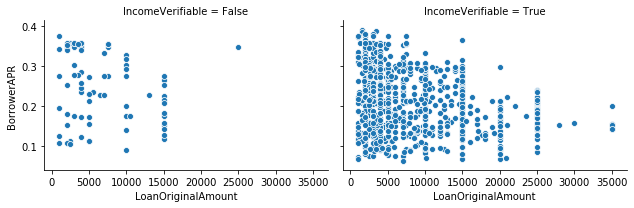

In [161]:
# borrowers with verifiable income borrow higher amounts more often
g = sb.FacetGrid(data = df_samp, col = 'IncomeVerifiable',
                size = 3, aspect = 1.5)
g.map(sb.scatterplot, 'LoanOriginalAmount', 'BorrowerAPR')
plt.show()

### Employment status

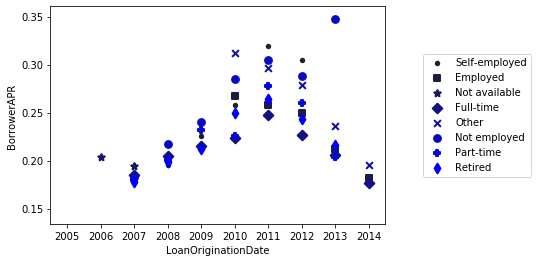

In [162]:
sb.pointplot(data = df, x = df['LoanOriginationDate'].dt.year, y = 'BorrowerAPR', hue = 'EmploymentStatus',\
             markers = ['.','s','*','D','x','o','P','d'], color = 'blue', errwidth=0, linestyles='')
plt.legend(loc = 'right', bbox_to_anchor=(1.45, 0.5), ncol=1);

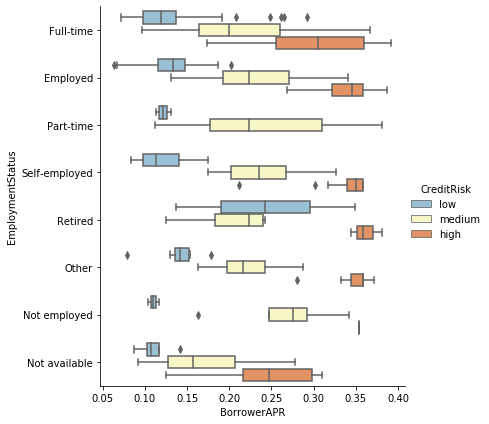

In [163]:
sb.catplot(y = 'EmploymentStatus', x = 'BorrowerAPR', hue = 'CreditRisk', order = \
           ['Full-time','Employed','Part-time','Self-employed','Retired','Other','Not employed','Not available'], \
           kind = 'box', data = df_samp, size = 6, palette = 'RdYlBu_r');

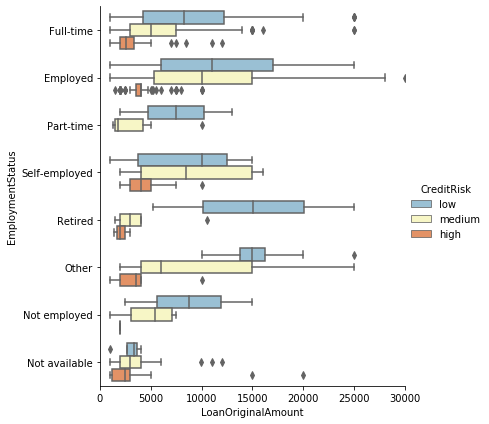

In [164]:
sb.catplot(y = 'EmploymentStatus', x = 'LoanOriginalAmount', hue = 'CreditRisk', order = \
           ['Full-time','Employed','Part-time','Self-employed','Retired','Other','Not employed','Not available'], \
           kind = 'box', data = df_samp, size = 6, palette = 'RdYlBu_r')
plt.xlim((0,30000));

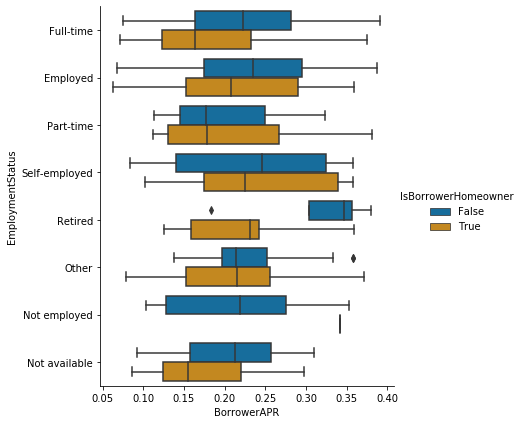

In [165]:
sb.catplot(y = 'EmploymentStatus', x = 'BorrowerAPR', hue = 'IsBorrowerHomeowner', order = \
           ['Full-time','Employed','Part-time','Self-employed','Retired','Other','Not employed','Not available'], \
           kind = 'box', data = df_samp, size = 6, palette = 'colorblind');

Differences among employment statuses are not very significant or consistent. This combined with knowing that employment categories are very imbalanced as was described earlier prevents from making any solid conclusions.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Credit risk category, as expected and hoped, is a major factor which segments the borrowers into clearly distinguishable groups.<br>
Being assigned into one of the risk categories strongly determines the interest rate and the borrowed amount.<br>
Borrowed amounts are increasing overall in the last few years, while the average interest rate is decreasing (especially for the medium and high risk groups).

### Were there any interesting or surprising interactions between features?

House ownership or income range are also great for borrower segmentation, but only until combined with credit risk. This is because house ownership, income range and many other available variables feed into the credit score/credit rating/credit risk calculations and once a borrower is assigned his credit rating/credit risk, these variables are already accounted for and make no difference anymore.